In [1]:
!pip install torchvision
#!pip install estnltk==1.7.2
#from gensim.models.doc2vec import Doc2Vec,TaggedDocument
from nltk.tokenize import word_tokenize
#from estnltk import Text
import nltk
#import gensim
import random
import torch
from transformers import BertTokenizer, BertModel
#from sklearn.metrics.pairwise import cosine_similarity

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [2]:
#Failide lugemiseks Colabis
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir("/content/drive/My Drive/Colab Notebooks/")

Mounted at /content/drive


In [3]:
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification, TFBertTokenizer

In [4]:
!pip install transformers
!pip install sentence-transformers
from sentence_transformers import SentenceTransformer
import sentence_transformers.util

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 3.2 MB/s eta 0:00:00


In [5]:
import pandas
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np
from ast import literal_eval
df = pandas.read_csv("ABC2.csv")
df_A2022 = pandas.read_csv("A2022.csv")
df_A2023 = pandas.read_csv("A2023.csv")

In [6]:
#tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')
#tokenizer = transformers.TFBertTokenizer.from_pretrained("bert-base-uncased")
#model = transformers.TFBertModel.from_pretrained("bert-base-uncased")
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [14]:
import pandas as pd
from transformers import pipeline
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', max_length=579, padding="max_length", truncation=True)

model = BertModel.from_pretrained('bert-base-uncased')
#enkood = tokenizer(test, truncation=True, padding=True, return_tensors="pt")
embedding_extractor = pipeline('feature-extraction', model='bert-base-uncased', max_length=579, padding="max_length", truncation=True)

In [7]:
test = df['Tekst'][1]
enkood = tokenizer(test, truncation=True, padding=True, return_tensors="pt")
print(enkood)

{'input_ids': tensor([[  101,  1996,  2343,  2003,  1996,  2132,  1997,  2110,  1998,  2003,
          4217,  2011,  1996,  3323,  2005,  1037,  4555,  1997,  2048,  2274,
          1011,  2095,  3408,  1025,  1996,  2436,  2515,  2025,  2907,  3237,
          2373,  1010,  2295,  1996,  2343,  4641,  1996,  2510,  1998,  3248,
          1037,  3145,  2535,  1999, 17739,  3026,  6794,  1012,  1996,  3539,
          2704,  2003,  1996,  2132,  1997,  2231,  1010,  1998,  2003,  4351,
          2011,  1996,  3484,  2283,  2030,  6056,  1012,  2138,  2119,  1996,
          2343,  1998,  3539,  2704,  2024,  3479,  2011,  2375, 12088,  1010,
          2037, 22568,  2003,  3227,  7790,  2006,  1996,  6204,  1997,  5768,
          3864,  1012,  1999,  2258,  2418,  1010,  6335,  4313, 18804,  1010,
          1996,  2132,  1997,  1996,  6102,  2929,  2005,  8346,  1006,  1048,
          5332,  1007,  1010,  2001,  3479,  2004,  2343,  1012,  8827,  3003,
          3968,  2072, 14115,  6025,  

# Siit algab koodi osa




In [ ]:
#failist_riigipaarideni("A2023.csv", 1)
#failist_riigipaarideni("A2023.csv", 2)
#failist_riigipaarideni("A2023.csv", 3)
#failist_riigipaarideni("D2023.csv", 1)
#failist_riigipaarideni("D2023.csv", 2)
#failist_riigipaarideni("D2023.csv", 3)
#failist_riigipaarideni("D2023.csv", 4)
#failist_riigipaarideni("C2023.csv", 1)
#failist_riigipaarideni("C2023.csv", 2)
#failist_riigipaarideni("C2023.csv", 3)
#failist_riigipaarideni("A2022.csv", 1)
#failist_riigipaarideni("A2022.csv", 2)
#failist_riigipaarideni("A2022.csv", 3)
#failist_riigipaarideni("A2021.csv", 1)
#failist_riigipaarideni("A2021.csv", 2)
#failist_riigipaarideni("A2021.csv", 3)

In [8]:
riikide_nimekiri = [ "afghanistan", "albania", "algeria", "andorra", "angola", "antigua-and-barbuda", "argentina", "armenia", "australia", "austria", "azerbaijan",
         "bahamas", "bahrain", "bangladesh", "barbados", "belarus", "belgium", "belize", "benin", "bhutan", "bolivia", "bosnia-and-herzegovina", "botswana", "brazil", "brunei", "bulgaria", "burkina-faso", "burundi",
          "cabo-verde", "cambodia", "cameroon", "canada", "central-african-republic", "chad", "chile", "china", "colombia", "comoros", "republic-congo", "costa-rica", "cote-divoire", "croatia", "cuba", "cyprus", "czech-republic",
          "denmark", "djibouti", "dominica", "dominican-republic", "democratic-republic-congo", "ecuador", "egypt", "el-salvador", "equatorial-guinea", "eritrea", "estonia", "eswatini", "ethiopia",
          "fiji", "finland", "france", "gabon", "gambia", "georgia", "germany", "ghana", "greece", "grenada", "guatemala", "guinea", "guinea-bissau", "guyana", "haiti", "honduras", "hungary",
          "iceland", "india", "indonesia", "iran", "iraq", "ireland", "israel", "italy", "jamaica", "japan", "jordan", "kazakhstan", "kenya", "kiribati", "kosovo", "kuwait", "kyrgyzstan",
          "laos", "latvia", "lebanon", "lesotho", "liberia", "libya", "liechtenstein", "lithuania", "luxembourg",
         "madagascar", "malawi", "malaysia", "maldives", "mali", "malta", "marshall-islands", "mauritania", "mauritius", "mexico", "micronesia", "moldova", "monaco", "mongolia", "montenegro", "morocco", "mozambique", "myanmar",
          "namibia", "nauru", "nepal", "netherlands", "new-zealand", "nicaragua", "niger", "nigeria", "north-korea", "north-macedonia", "norway",
          "oman", "pakistan", "palau", "panama", "papua-new-guinea", "paraguay", "peru", "philippines", "poland", "portugal", "qatar", "romania", "russia", "rwanda",
          "st-kitts-and-nevis", "st-lucia", "samoa", "san-marino", "sao-tome-and-principe","saudi-arabia", "senegal", "serbia", "seychelles", "sierra-leone", "singapore", "slovakia",
          "slovenia", "solomon-islands","somalia", "south-africa", "south-korea", "south-sudan", "spain", "sri-lanka", "st-vincent-and-grenadines", "sudan", "suriname", "sweden", "switzerland", "syria",
          "taiwan", "tajikistan", "tanzania", "thailand", "timor-leste", "togo", "tonga", "trinidad-and-tobago", "tunisia", "turkey", "turkmenistan", "tuvalu", "uganda", "ukraine", "united-arab-emirates",
          "united-states", "united-kingdom", "uruguay", "uzbekistan", "vanuatu", "venezuela", "vietnam", "yemen", "zambia", "zimbabwe"]
print(len(riikide_nimekiri))
test = [1]
print(len(test))

195
1


In [9]:
#siin tahan teha dictionarit
d1=dict.fromkeys(riikide_nimekiri, 0)
print(d1)
#annad talle sisse ühe dataframe, ja ta siis sulle ütleb, kui paljudel on skoor metsas
#RETURNs a list of dictionaries
def dictionarid(riigipaarid):
  hamming_distances_dict = []
  for i in riigipaarid:
    d_ajutine = d1.copy()
    i = pandas.read_csv(i)
    for j in range(i.shape[0]):
      esimene_skoor = i["Skoor"][j]
      teine_skoor = i["Skoor2"][j]
      riik1 = i["Country"][j]
      riik2 = i["Riik"][j]
      d_ajutine.update({riik1: d_ajutine.get(riik1)+esimene_skoor - teine_skoor})
      d_ajutine.update({riik2: d_ajutine.get(riik2)-esimene_skoor + teine_skoor})
    hamming_distances_dict.append(d_ajutine)

  return hamming_distances_dict
  #print(hamming_distances)

{'afghanistan': 0, 'albania': 0, 'algeria': 0, 'andorra': 0, 'angola': 0, 'antigua-and-barbuda': 0, 'argentina': 0, 'armenia': 0, 'australia': 0, 'austria': 0, 'azerbaijan': 0, 'bahamas': 0, 'bahrain': 0, 'bangladesh': 0, 'barbados': 0, 'belarus': 0, 'belgium': 0, 'belize': 0, 'benin': 0, 'bhutan': 0, 'bolivia': 0, 'bosnia-and-herzegovina': 0, 'botswana': 0, 'brazil': 0, 'brunei': 0, 'bulgaria': 0, 'burkina-faso': 0, 'burundi': 0, 'cabo-verde': 0, 'cambodia': 0, 'cameroon': 0, 'canada': 0, 'central-african-republic': 0, 'chad': 0, 'chile': 0, 'china': 0, 'colombia': 0, 'comoros': 0, 'republic-congo': 0, 'costa-rica': 0, 'cote-divoire': 0, 'croatia': 0, 'cuba': 0, 'cyprus': 0, 'czech-republic': 0, 'denmark': 0, 'djibouti': 0, 'dominica': 0, 'dominican-republic': 0, 'democratic-republic-congo': 0, 'ecuador': 0, 'egypt': 0, 'el-salvador': 0, 'equatorial-guinea': 0, 'eritrea': 0, 'estonia': 0, 'eswatini': 0, 'ethiopia': 0, 'fiji': 0, 'finland': 0, 'france': 0, 'gabon': 0, 'gambia': 0, 'geo

Nüüd teen riikide dictionari asja ainult nende riikidega, mis on üle 2st. Pekasid tegelt tegema dictionari tegemise ainult 2std riikide kohta eraldi, praegu on küsimus, et mida tähendab 0


In [10]:
d1=dict.fromkeys(riikide_nimekiri, 0)
def dictionarid_2std(riigipaarid):
  hamming_distances_dict = []
  for i in riigipaarid:
    d_ajutine = d1.copy()
    i = pandas.read_csv(i)
    keskmine = i["cosinesimilarity"].mean()
    std = i["cosinesimilarity"].std()
    df_2std = i[i["cosinesimilarity"] > (keskmine + 2*std)]
    df_2std = df_2std.reset_index(drop=True)
    for j in range(df_2std.shape[0]):
      esimene_skoor = df_2std["Skoor"][j]
      teine_skoor = df_2std["Skoor2"][j]
      riik1 = df_2std["Country"][j]
      riik2 = df_2std["Riik"][j]
      d_ajutine.update({riik1: d_ajutine.get(riik1)+esimene_skoor - teine_skoor})
      d_ajutine.update({riik2: d_ajutine.get(riik2)-esimene_skoor + teine_skoor})
    hamming_distances_dict.append(d_ajutine)

  return hamming_distances_dict
  #print(hamming_distances)

In [11]:
d1=dict.fromkeys(riikide_nimekiri, 0)
def dictionarid_2std(riigipaarid):
  hamming_distances_dict = []
  for i in riigipaarid:
    d_ajutine = d1.copy()
    data = pandas.read_csv(i)
    pct_99 = data["cosinesimilarity"].quantile(0.99)
    df_99pct = data[data["cosinesimilarity"] > pct_99]
    ajutine_99pct = sum(abs(df_99pct["Skoor"] - df_99pct["Skoor2"]))
    df_99pct = df_99pct.reset_index(drop=True)
    for j in range(df_99pct.shape[0]):
      esimene_skoor = df_99pct["Skoor"][j]
      teine_skoor = df_99pct["Skoor2"][j]
      riik1 = df_99pct["Country"][j]
      riik2 = df_99pct["Riik"][j]
      d_ajutine.update({riik1: d_ajutine.get(riik1)+esimene_skoor - teine_skoor})
      d_ajutine.update({riik2: d_ajutine.get(riik2)-esimene_skoor + teine_skoor})
    hamming_distances_dict.append(d_ajutine)

  return hamming_distances_dict
  #print(hamming_distances)

In [12]:
d1=dict.fromkeys(riikide_nimekiri, 0)
def dictionarid_99(riigipaarid):
  hamming_distances_dict = []
  d_ajutine = d1.copy()
  for i in riigipaarid:
    data = pandas.read_csv(i)
    pct_99 = data["cosinesimilarity"].quantile(0.99)
    df_99pct = data[data["cosinesimilarity"] > pct_99]
    ajutine_99pct = sum(abs(df_99pct["Skoor"] - df_99pct["Skoor2"]))
    df_99pct = df_99pct.reset_index(drop=True)
    for j in range(df_99pct.shape[0]):
      esimene_skoor = df_99pct["Skoor"][j]
      teine_skoor = df_99pct["Skoor2"][j]
      riik1 = df_99pct["Country"][j]
      riik2 = df_99pct["Riik"][j]
      d_ajutine.update({riik1: d_ajutine.get(riik1)+esimene_skoor - teine_skoor})
      d_ajutine.update({riik2: d_ajutine.get(riik2)-esimene_skoor + teine_skoor})
    hamming_distances_dict.append(d_ajutine)

  return hamming_distances_dict
  #print(hamming_distances)

In [19]:
uuritav = dictionarid_99([
    "A1paarid2023.csv", "A2paarid2023.csv", "A3paarid2023.csv",
    "B1paarid2023.csv", "B2paarid2023.csv", "B3paarid2023.csv","B4paarid2023.csv",
    "C1paarid2023.csv", "C2paarid2023.csv", "C3paarid2023.csv",
    "D1paarid2023.csv", "D2paarid2023.csv", "D3paarid2023.csv","D4paarid2023.csv",
    "E1paarid2023.csv", "E2paarid2023.csv", "E3paarid2023.csv",
    "F1paarid2023.csv", "F2paarid2023.csv", "F3paarid2023.csv","F4paarid2023.csv",
    "G1paarid2023.csv", "G2paarid2023.csv", "G3paarid2023.csv","G4paarid2023.csv"
])
uuritav3 = {key: value for key, value in uuritav[0].items() if value != 0}
print(uuritav3)
keysA1 = uuritav3.keys()
print(keysA1)
print(len(keysA1))
#DRAAKON

{'afghanistan': -12, 'albania': -1, 'algeria': 3, 'andorra': 2, 'angola': -21, 'antigua-and-barbuda': -3, 'argentina': 26, 'armenia': 16, 'australia': 3, 'austria': -1, 'azerbaijan': -58, 'bahamas': 6, 'bahrain': -28, 'bangladesh': 33, 'barbados': 7, 'belarus': -68, 'belgium': 7, 'belize': 9, 'benin': 26, 'bhutan': 9, 'bolivia': 16, 'bosnia-and-herzegovina': -1, 'botswana': 80, 'brazil': 22, 'brunei': 2, 'bulgaria': 21, 'burkina-faso': 3, 'burundi': -31, 'cabo-verde': 7, 'cambodia': -23, 'cameroon': -59, 'central-african-republic': -56, 'chad': -29, 'chile': 14, 'china': -22, 'colombia': 67, 'comoros': 21, 'republic-congo': -27, 'costa-rica': 27, 'cote-divoire': 33, 'croatia': 7, 'cuba': -36, 'cyprus': 15, 'czech-republic': -2, 'djibouti': -10, 'dominica': 37, 'dominican-republic': 8, 'democratic-republic-congo': -47, 'ecuador': 53, 'egypt': -65, 'el-salvador': 26, 'equatorial-guinea': -37, 'eritrea': -12, 'estonia': 10, 'eswatini': -70, 'ethiopia': -29, 'fiji': -1, 'finland': 15, 'fra

In [43]:
df = pd.DataFrame(list(uuritav3.items()), columns=['Riik', 'Skooride erinevus'])
df_sorted_ascending = df.sort_values(by='Skooride erinevus', ascending=True)
df_sorted_false = df.sort_values(by='Skooride erinevus', ascending=False)
top_10_df = df_sorted_false.nlargest(10, 'Skooride erinevus').reset_index(drop=True)
bottom_10_df = df_sorted_ascending.nsmallest(10, 'Skooride erinevus').reset_index(drop=True)
# Display the DataFrame
#df_sorted_ascending
bottom_10_df
#display(df_sorted_false)

,Riik,Skooride erinevus
0,gabon,-90
1,saudi-arabia,-77
2,nicaragua,-72
3,rwanda,-71
4,iran,-71
5,eswatini,-70
6,venezuela,-69
7,belarus,-68
8,libya,-67
9,egypt,-65


Text(0.5, 0, 'riigi skoori erinevuskõigi temaga paaris olevate riikide suhtes')

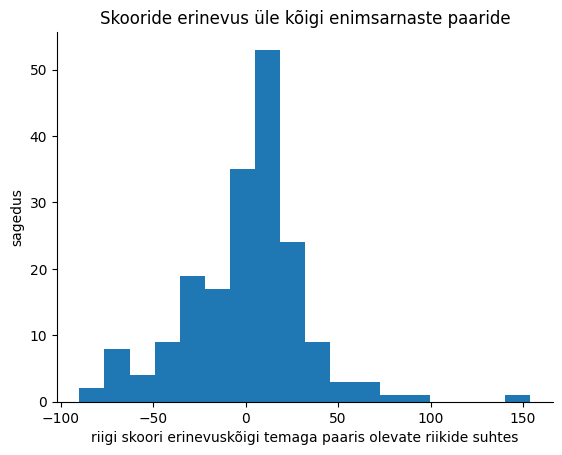

In [39]:
from matplotlib import pyplot as plt
df_sorted_false['Skooride erinevus'].plot(kind='hist', bins=18, title='Skooride erinevus üle kõigi enimsarnaste paaride')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.ylabel('sagedus')
plt.xlabel('riigi skoori erinevuskõigi temaga paaris olevate riikide suhtes')

In [ ]:
#d1A_2std = dictionarid_2std(['A1paarid2023.csv', 'A2paarid2023.csv', 'A3paarid2023.csv', 'A1paarid2022.csv', 'A2paarid2022.csv', 'A3paarid2022.csv', 'A1paarid2021.csv', 'A2paarid2021.csv', 'A3paarid2021.csv'])
d1A_2std = dictionarid_2std(['A1paarid2023.csv', 'A2paarid2023.csv', 'A3paarid2023.csv'])

In [ ]:
print(d1A_2std[0])
for i in range(len(d1A_2std)):
  print("Küsimus " + str(i))
  min_value = min(d1A_2std[i].values())
  print("kõige väiksem on " + str(min_value))
  max_value = max(d1A_2std[i].values())
  print("kõige suurem on " + str(max_value))

##siit edasi lähevad testid


In [ ]:
#df_1std.nunique()
value_counts_series = df_15std['Country'].value_counts()
value_counts_df = value_counts_series.reset_index()
value_counts_df.columns = ['Value', 'Count']
# Display the resulting DataFrame
print(value_counts_df)

In [ ]:
value_counts_series = df_15std['Riik'].value_counts()
# Convert the Series to a DataFrame
value_counts_df2 = value_counts_series.reset_index()
value_counts_df2.columns = ['Value', 'Count']
print(value_counts_df2)

In [ ]:
#siin kontrollin selle ilma 1.5std filtriga dataframe korrektsust, kui seal on ntks alumisi riike kõige rohkem siis korras
value_counts_series = df_ajutine['Riik'].value_counts()

In [ ]:
#siin ma katsetan faili sisselugemist
df_A1paarid2021 = pandas.read_csv("A1paarid.csv")
#print(df_A1paarid2023.iloc[54])eesti ja afghanistaani sarnasus oli 0.899129
df_A1paarid_kaks_2021 = pandas.read_csv("A1paarid2021.csv")
#print(df_A1paarid2021.equals(df_A1paarid_kaks_2021))
#df_A1paarid2021

In [ ]:
#df_A1paarid_kaks_2021

In [ ]:
#kuidas teha seda riikide põhiselt? ma saan samamoodi itereerida üle, mõlemal juhul kutsun sama dictionarit välja lihtsalt

##teine A küsimus

In [ ]:
embeddingud = []
df = pandas.read_csv("A2023.csv")
df2 = pandas.DataFrame()
df2.loc[:, 'Country'] = df.loc[:, 'Country']
df2.loc[:, 'Tekst'] = df.loc[:, 'Tekst']
df2.loc[:, 'Skoor'] = df.loc[:, 'Skoor']
for i in range(df2["Tekst"].shape[0]):
    vaadatava_riigi_tekst = df2['Tekst'][i]
    enkood = tokenizer(vaadatava_riigi_tekst, truncation=True, padding=True, return_tensors="pt")
    vaad_input = enkood["input_ids"]
    vaad_mask = enkood['attention_mask']
    with torch.no_grad():
        vaad_outputs = model(vaad_input, attention_mask=vaad_mask)
        lause_embedding = vaad_outputs.last_hidden_state.mean(dim=1)
    embeddingud.append(lause_embedding)
df2["embedding"] = embeddingud
#res = [cosine_similarity(a, b) for idx, a in enumerate(test3) for b in test3[idx + 1:]]
#df2.to_csv("test1104.csv")

In [ ]:
from sklearn.manifold import TSNE
import numpy as np
from ast import literal_eval

muutuja = df2.embedding[0]
muutuja2 = df2.embedding[1]
muutujad = []
muutujad.append(muutuja)
muutujad.append(muutuja2)
matrix = np.array(muutujad)

# Create a t-SNE model and transform the data
tsne = TSNE(n_components=2, perplexity=1, random_state=42, init='random', learning_rate=200)
vis_dims = tsne.fit_transform(matrix)
vis_dims.shape

In [ ]:
# Load the embeddings
from sklearn.manifold import TSNE
import numpy as np
from ast import literal_eval

#datafile_path = "test1104.csv"
#df = pandas.read_csv(datafile_path)

# Convert to a list of lists of floats
list_ajutine = []
for emb in df2.embedding:
  ajutine = emb.tolist()
  list_ajutine
df2_embd = df2.embedding.tolist()
#matrix = np.array(df2.embedding.apply(literal_eval).to_list())

# Create a t-SNE model and transform the data
tsne = TSNE(n_components=2, perplexity=15, random_state=42, init='random', learning_rate=200)
vis_dims = tsne.fit_transform(matrix)
vis_dims.shape

In [ ]:
failstatav = []
tagastatav = []
for i in range(193):
  vaadatava_riigi_tekst = df['Tekst2'][i]
  vaadatava_riigi_nimi = df["Country"][i]
  vaadatava_riigi_skoor = df["Skoor2"][i]
  vaadatava_riigi_embed = a2kysimus[i]
  #enumerate selle jaoks, et saaks indeksi ja embeddingu korraga
  for idx, embed in enumerate(a2kysimus):
    if (idx > i):
      sisese_riigi_tekst = df['Tekst2'][idx]
      sisese_riigi_nimi = df["Country"][idx]
      sisese_riigi_skoor = df["Skoor2"][idx]
      leitud_embedding = sentence_transformers.util.cos_sim(a2kysimus[i], embed).item()
      falistatav = [vaadatava_riigi_nimi, vaadatava_riigi_tekst, vaadatava_riigi_skoor, sisese_riigi_nimi, sisese_riigi_tekst, sisese_riigi_skoor, leitud_embedding]
    else:
      continue
    tagastatav.append(falistatav)
#res = [cosine_similarity(a, b) for idx, a in enumerate(test3) for b in test3[idx + 1:]]

In [ ]:
df_a2 = pandas.DataFrame(tagastatav)
df_a2.columns = ["Country", "Tekst", "Skoor", "riik", "Tekst2", "Skoor2", "cosinesimilarity"]
df_a2.to_csv("A2paarid", index=False)
#df_a2

In [ ]:
keskmine = df_a2["cosinesimilarity"].mean()
std = df_a2["cosinesimilarity"].std()
df_1std = df_a2[df_a2["cosinesimilarity"] > (keskmine + 1.5*std)]
print("keskmine + 1.5std on " + str(keskmine + 1.5*std))
df_1std.info()

## B küsimused
Siit alates üritan B küsimusi teha




In [ ]:
riigipaarid = ['B1paarid2023.csv','B2paarid2023.csv','B3paarid2023.csv', 'B4paarid2023.csv']
hamming_distances_2std_b = []
riigid_vastavad = []
for i in riigipaarid:
  i = pandas.read_csv(i)
  ajutine = 0
  keskmine = i["cosinesimilarity"].mean()
  std = i["cosinesimilarity"].std()
  df_2std = i[i["cosinesimilarity"] > (keskmine + 2*std)]
  df_2std = df_2std.reset_index(drop=True)
  for j in range(df_2std.shape[0]):
    esimene_skoor = df_2std["Skoor"][j]
    teine_skoor = df_2std["Skoor2"][j]
    arvutus = abs(esimene_skoor - teine_skoor)
    ajutine += arvutus
  hamming_distances_2std_b.append(ajutine)

print(hamming_distances_2std_b)


In [ ]:
#siin tulpdiagramm nendest, kus on 2std-ga juba eemaldatud asju
x = range(len(hamming_distances_2std_b))
hamming = ['B1', 'B2', 'B3', "B4"]
colors = ['b', 'g', 'r', "y"]
plt.bar(x, hamming_distances_2std_b, color = colors)

plt.xlabel("")
plt.ylabel("skooride erinevuse indeks")
plt.title("Skooride erinevuse indeks B-kategooria küsimuste vahel")
plt.xticks(x, hamming, rotation=45, ha='right')

plt.show()

In [ ]:
uuritav = dictionarid_2std(["B2paarid2023.csv"])
uuritav2 = {key: value for key, value in uuritav[0].items() if value != 0}
print(uuritav2)
keys = uuritav2.keys()
print(keys)
print(len(keys))

In [ ]:
import pandas as pd
from transformers import pipeline
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', max_length=510, padding="max_length")
model = BertModel.from_pretrained('bert-base-uncased')
embedding_extractor = pipeline('feature-extraction', model='bert-base-uncased', max_length=510, padding="max_length")

df = pd.read_csv("B2023.csv")
riigid = df["Country"].tolist()
tekstid = df["Tekst2"].tolist()
skoorid = df["Skoor2"].tolist()
emb = [embedding_extractor(tekst)[0][0] for tekst in tekstid]
embid = np.array(emb)

#countrylist = ["France", "Spain"]  # Make sure the country names match exactly how they appear in the DataFrame

# Filter rows based on the list of countries
filtered_df = df[df['Country'].isin(keys)]
fil_tekstid = filtered_df["Tekst2"].tolist()
fil_skoorid = filtered_df["Skoor2"].tolist()
fil_riigid = filtered_df["Country"].tolist()
emb2 = [embedding_extractor(tekst)[0][0] for tekst in fil_tekstid]
embid2 = np.array(emb2)

In [ ]:
#siin üritan katsetada seda et saad ainult probleemsed riigid graafile
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
words_reduced = tsne.fit_transform(embid)

plt.figure(figsize=(12, 12))
plt.scatter(words_reduced[:, 0], words_reduced[:, 1])

for i, word in enumerate(riigid):
    plt.annotate(word, xy=(words_reduced[i, 0], words_reduced[i, 1]), xytext=(5, 2),
                  textcoords='offset points', ha='right', va='bottom')

plt.title('2023B2 riikide tekstide embeddingute hinnang')
plt.xlabel('Some other feature')
plt.ylabel('Catness')
plt.grid(True)
plt.axis('equal')
plt.show()

In [ ]:
#siin üritan katsetada seda et saad ainult probleemsed riigid graafile
coloursA2 = np.repeat("maroon", 195)
for i in range(195):
  skoor = skoorid[i]
  if skoor == 4:
    coloursA2[i] = "green"
  elif skoor == 3:
    coloursA2[i] = "yellow"
  elif skoor == 2:
    coloursA2[i] = "orange"
  elif skoor == 1:
    coloursA2[i] = "red"

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
words_reduced = tsne.fit_transform(embid)

plt.figure(figsize=(12, 12))
plt.scatter(words_reduced[:, 0], words_reduced[:, 1], color = coloursA2)

for i, word in enumerate(riigid):
    if word in keys:
      plt.annotate(word, xy=(words_reduced[i, 0], words_reduced[i, 1]), xytext=(5, 2),
                  textcoords='offset points', ha='right', va='bottom')

plt.title('2023B2 riikide tekstide embeddingute hinnang')
plt.xlabel('Some other feature')
plt.ylabel('Catness')
plt.grid(True)
plt.axis('equal')
plt.show()

In [ ]:
#siin üritan katsetada seda et saad ainult probleemsed riigid graafile
coloursA2 = np.repeat("maroon", 195)
for i in range(195):
  skoor = skoorid[i]
  if skoor == 4:
    coloursA2[i] = "green"
  elif skoor == 3:
    coloursA2[i] = "yellow"
  elif skoor == 2:
    coloursA2[i] = "orange"
  elif skoor == 1:
    coloursA2[i] = "red"

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
words_reduced = tsne.fit_transform(embid)

plt.figure(figsize=(12, 12))
plt.scatter(words_reduced[:, 0], words_reduced[:, 1], color = coloursA2)

for i, word in enumerate(riigid):
    plt.annotate(word, xy=(words_reduced[i, 0], words_reduced[i, 1]), xytext=(5, 2),
                  textcoords='offset points', ha='right', va='bottom')

plt.title('2023B2 riikide tekstide embeddingute hinnang')
plt.grid(True)
plt.axis('equal')
plt.show()

In [ ]:
#siin üritan katsetada seda et saad ainult probleemsed riigid graafile
tsne = TSNE(n_components=2, perplexity=24, random_state=40)
words_reduced = tsne.fit_transform(embid2)

plt.figure(figsize=(12, 12))
plt.scatter(words_reduced[:, 0], words_reduced[:, 1])

for i, word in enumerate(fil_riigid):
    plt.annotate(word, xy=(words_reduced[i, 0], words_reduced[i, 1]), xytext=(5, 2),textcoords='offset points', ha='right', va='bottom')

plt.title('2023B2 riikide tekstide embeddingute hinnang')
plt.xlabel('Some other feature')
plt.ylabel('Catness')
plt.grid(True)
plt.axis('equal')
plt.show()

##A küsimused

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', max_length=510, padding="max_length", truncation = True)
model = BertModel.from_pretrained('bert-base-uncased')
embedding_extractor = pipeline('feature-extraction', model='bert-base-uncased', max_length=510, padding="max_length", truncation = True)
df = pd.read_csv("A2023.csv")
riigid = df["Country"].tolist()
tekstid = df["Tekst"].tolist()
skoorid = df["Skoor"].tolist()
emb = [embedding_extractor(tekst)[0][0] for tekst in tekstid]
embid = np.array(emb)
print(len(embid))
colours2 = np.repeat("maroon", 195)
for i in range(195):
  skoor = skoorid[i]
  if skoor == 4:
    colours2[i] = "green"
  elif skoor == 3:
    colours2[i] = "yellow"
  elif skoor == 2:
    colours2[i] = "orange"
  elif skoor == 1:
    colours2[i] = "red"

In [ ]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
words_reduced = tsne.fit_transform(embid)

plt.figure(figsize=(12, 12))
plt.scatter(words_reduced[:, 0], words_reduced[:, 1], c = colours2)

for i, word in enumerate(riigid):
    plt.annotate(word, xy=(words_reduced[i, 0], words_reduced[i, 1]), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom')

plt.title('A1 riikide tekstide embeddingute hinnang')
plt.xlabel('y')
plt.ylabel('x')
plt.grid(True)
plt.axis('equal')
plt.show()

In [ ]:
words_reduced = tsne.fit_transform(embid)
uuritav = dictionarid_2std(["A1paarid2023.csv"])
uuritav2 = {key: value for key, value in uuritav[0].items() if value != 0}
print(uuritav2)
keysA1 = uuritav2.keys()
print(keysA1)
print(len(keysA1))

plt.figure(figsize=(12, 12))
plt.scatter(words_reduced[:, 0], words_reduced[:, 1], color = coloursA2)

for i, word in enumerate(riigid):
    if word in keysA1:
      plt.annotate(word, xy=(words_reduced[i, 0], words_reduced[i, 1]), xytext=(5, 2),
                  textcoords='offset points', ha='right', va='bottom')

plt.title('A1 riikide tekstide embeddingute hinnang')
plt.xlabel('y')
plt.ylabel('x')
plt.grid(True)
plt.axis('equal')
plt.show()

In [ ]:
i = "A1paarid2023.csv"
dfa1 = pandas.read_csv(i)
#dfa1
keskmine = dfa1["cosinesimilarity"].mean()
print(keskmine)
std = dfa1["cosinesimilarity"].std()
print((keskmine + 2*std))
df_2std = dfa1[dfa1["cosinesimilarity"] > (keskmine + 2*std)]
df_2std = df_2std.reset_index(drop=True)
df = df_2std.sort_values(by='cosinesimilarity', ascending=False)
print(len(df))

In [ ]:
i = "E3paarid2023.csv"
dfa1 = pandas.read_csv(i)
std = dfa1["cosinesimilarity"].std()
print(std)
print((keskmine + 2*std))

plt.hist(dfa1["cosinesimilarity"], bins=20)  # Adjust the number of bins as needed
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogramm E3')
plt.show()
dfa2 = pandas.read_csv("A1paarid2023.csv")
plt.hist(dfa2["cosinesimilarity"], bins=20)  # Adjust the number of bins as needed
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogramm A1')
plt.show()
dfa2 = pandas.read_csv("A2paarid2023.csv")
plt.hist(dfa2["cosinesimilarity"], bins=20)  # Adjust the number of bins as needed
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Column Values')
plt.show()
dfa2 = pandas.read_csv("A3paarid2023.csv")
plt.hist(dfa2["cosinesimilarity"], bins=20)  # Adjust the number of bins as needed
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Column Values')
plt.show()

#C kategooria osa

In [ ]:
#C1paarid2023 = pandas.read_csv("C1paarid2023.csv")
#C2paarid2023 = pandas.read_csv("C2paarid2023.csv")
#C3paarid2023 = pandas.read_csv("C3paarid2023.csv")

In [ ]:
riigipaarid = ['C1paarid2023.csv','C2paarid2023.csv','C3paarid2023.csv']
hamming_distances_1pct = []
hamming_distances_99pct = []
riigid_vastavad = []
for i in riigipaarid:
  i = pandas.read_csv(i)
  pct_99 = i["cosinesimilarity"].quantile(0.99)
  df_1pct = i[i["cosinesimilarity"] > pct_99]
  df_1pct = df_1pct.reset_index(drop=True)
  #siin on alumine 1%
  pct_1 = i["cosinesimilarity"].quantile(0.01)
  df_bottom_1pct = i[i["cosinesimilarity"] < pct_1]
  df_bottom_1pct = df_bottom_1pct.reset_index(drop=True)
  print(len(df_1pct))
  print(len(df_bottom_1pct))
  for j in range(df_1pct.shape[0]):
    esimene_skoor = df_1pct["Skoor"][j]
    teine_skoor = df_1pct["Skoor2"][j]
    arvutus = abs(esimene_skoor - teine_skoor)
    ajutine += arvutus
  hamming_distances_2std_b.append(ajutine)

print(hamming_distances_2std_b)
#siin tulpdiagramm nendest, kus on 2std-ga juba eemaldatud asju
x = range(len(hamming_distances_2std_b))
hamming = ['C1', 'C2', 'C3']
colors = ['b', 'g', 'r']
plt.bar(x, hamming_distances_2std_b, color = colors)

plt.xlabel("")
plt.ylabel("skooride erinevuse indeks")
plt.title("Skooride erinevuse indeks C-kategooria küsimuste vahel")
plt.xticks(x, hamming, rotation=45, ha='right')

plt.show()

In [ ]:
#df_bottom_1pct
#df_1pct
riigipaarid = ['C1paarid2023.csv','C2paarid2023.csv','C3paarid2023.csv']
hamming_distances_1pct = []
hamming_distances_99pct = []

for filename in riigipaarid:
    data = pandas.read_csv(filename)
    ajutine_1pct = 0
    ajutine_99pct = 0
    pct_1 = data["cosinesimilarity"].quantile(0.01)
    pct_99 = data["cosinesimilarity"].quantile(0.99)
    df_1pct = data[data["cosinesimilarity"] < pct_1]
    df_1pct = df_1pct.reset_index(drop=True)
    df_99pct = data[data["cosinesimilarity"] > pct_99]
    df_99pct = df_99pct.reset_index(drop=True)
    for j in range(df_1pct.shape[0]):
        esimene_skoor = df_1pct["Skoor"][j]
        teine_skoor = df_1pct["Skoor2"][j]
        arvutus = abs(esimene_skoor - teine_skoor)
        ajutine_1pct += arvutus

    for j in range(df_99pct.shape[0]):
        esimene_skoor = df_99pct["Skoor"][j]
        teine_skoor = df_99pct["Skoor2"][j]
        arvutus = abs(esimene_skoor - teine_skoor)
        ajutine_99pct += arvutus

    hamming_distances_1pct.append(ajutine_1pct)
    hamming_distances_99pct.append(ajutine_99pct)
print(hamming_distances_1pct)
print(hamming_distances_99pct)
# Plotting the bar chart
x = range(len(hamming_distances_1pct))
hamming = ['C1', 'C2', 'C3']
colors = ['b']

plt.bar(x, hamming_distances_1pct, color=colors, label='alumine 1%')
plt.bar(x, hamming_distances_99pct, color='red', label='ülemine 99%', alpha=1)

plt.xlabel("")
plt.ylabel("skooride erinevuse indeks")
plt.title("Skooride erinevuse indeks C-kategooria küsimuste vahel")
plt.xticks(x, hamming, rotation=45, ha='right')
plt.legend()

plt.show()

In [ ]:
riigipaarid = ['A1paarid2023.csv','A2paarid2023.csv','A3paarid2023.csv']
hamming_distances_1pct = []
hamming_distances_99pct = []
bar_width = 0.35
for filename in riigipaarid:
    data = pandas.read_csv(filename)
    pct_1 = data["cosinesimilarity"].quantile(0.01)
    pct_99 = data["cosinesimilarity"].quantile(0.99)

    # Select the bottom 1% of the data
    df_1pct = data[data["cosinesimilarity"] < pct_1]
    df_1pct = df_1pct.reset_index(drop=True)

    # Select the top 99% of the data
    df_99pct = data[data["cosinesimilarity"] > pct_99]
    df_99pct = df_99pct.reset_index(drop=True)

    ajutine_1pct = sum(abs(df_1pct["Skoor"] - df_1pct["Skoor2"]))
    ajutine_99pct = sum(abs(df_99pct["Skoor"] - df_99pct["Skoor2"]))

    hamming_distances_1pct.append(ajutine_1pct)
    hamming_distances_99pct.append(ajutine_99pct)
plt.ylim(0, 600)
x = np.arange(len(riigipaarid))
plt.bar(x - bar_width/2, hamming_distances_1pct, bar_width, label='alumine 1%')
plt.bar(x + bar_width/2, hamming_distances_99pct, bar_width, label='ülemine 99%')
plt.xlabel("Riigipaarid")
plt.ylabel("Skooride erinevuse indeks")
plt.title("Skooride erinevuse indeks A-kategooria küsimuste vahel")
hamming = ['A1', 'A2', 'A3']
plt.xticks(x, hamming)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
riigipaarid = ['B1paarid2023.csv','B2paarid2023.csv','B3paarid2023.csv', 'B4paarid2023.csv']
hamming_distances_1pct = []
hamming_distances_99pct = []
bar_width = 0.35

for filename in riigipaarid:
    data = pandas.read_csv(filename)

    # Calculate the 1st percentile
    pct_1 = data["cosinesimilarity"].quantile(0.01)

    # Calculate the 99th percentile
    pct_99 = data["cosinesimilarity"].quantile(0.99)

    # Select the bottom 1% of the data
    df_1pct = data[data["cosinesimilarity"] < pct_1]
    df_1pct = df_1pct.reset_index(drop=True)

    # Select the top 99% of the data
    df_99pct = data[data["cosinesimilarity"] > pct_99]
    df_99pct = df_99pct.reset_index(drop=True)

    # Calculate the sum of differences for bottom 1% instances
    ajutine_1pct = sum(abs(df_1pct["Skoor"] - df_1pct["Skoor2"]))

    # Calculate the sum of differences for top 99% instances
    ajutine_99pct = sum(abs(df_99pct["Skoor"] - df_99pct["Skoor2"]))

    # Append the sums to respective lists
    hamming_distances_1pct.append(ajutine_1pct)
    hamming_distances_99pct.append(ajutine_99pct)

# Set the x locations for the groups
x = np.arange(len(riigipaarid))

# Plotting the bar chart
plt.bar(x - bar_width/2, hamming_distances_1pct, bar_width, label='alumine 1%')
plt.bar(x + bar_width/2, hamming_distances_99pct, bar_width, label='ülemine 99%')
plt.ylim(0, 600)
# Add labels, title, and legend
plt.xlabel("Riigipaarid")
plt.ylabel("Skooride erinevuse indeks")
plt.title("Skooride erinevuse indeks B-kategooria küsimuste vahel")
hamming = ['B1', 'B2', 'B3', "B4"]
plt.xticks(x, hamming)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

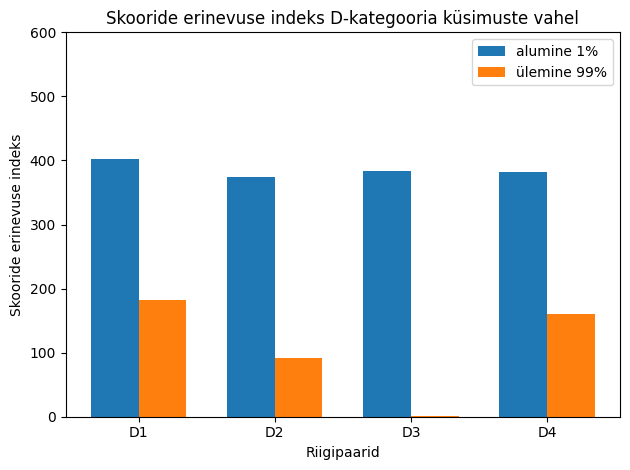

In [ ]:
riigipaarid = ['D1paarid2023.csv','D2paarid2023.csv','D3paarid2023.csv', 'D4paarid2023.csv']
hamming_distances_1pct = []
hamming_distances_99pct = []
bar_width = 0.35

for filename in riigipaarid:
    data = pandas.read_csv(filename)
    pct_1 = data["cosinesimilarity"].quantile(0.01)
    pct_99 = data["cosinesimilarity"].quantile(0.99)
    df_1pct = data[data["cosinesimilarity"] < pct_1]
    df_1pct = df_1pct.reset_index(drop=True)
    df_99pct = data[data["cosinesimilarity"] > pct_99]
    df_99pct = df_99pct.reset_index(drop=True)

    # Calculate the sum of differences for bottom 1% instances
    ajutine_1pct = sum(abs(df_1pct["Skoor"] - df_1pct["Skoor2"]))

    # Calculate the sum of differences for top 99% instances
    ajutine_99pct = sum(abs(df_99pct["Skoor"] - df_99pct["Skoor2"]))
    hamming_distances_1pct.append(ajutine_1pct)
    hamming_distances_99pct.append(ajutine_99pct)

# Set the x locations for the groups
x = np.arange(len(riigipaarid))
plt.bar(x - bar_width/2, hamming_distances_1pct, bar_width, label='alumine 1%')
plt.bar(x + bar_width/2, hamming_distances_99pct, bar_width, label='ülemine 99%')
plt.ylim(0, 600)
# Add labels, title, and legend
plt.xlabel("Riigipaarid")
plt.ylabel("Skooride erinevuse indeks")
plt.title("Skooride erinevuse indeks D-kategooria küsimuste vahel")
hamming = ['D1', 'D2', 'D3', "D4"]
plt.xticks(x, hamming)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
riigipaarid = ['E1paarid2023.csv','E2paarid2023.csv','E3paarid2023.csv']
hamming_distances_1pct = []
hamming_distances_99pct = []
bar_width = 0.35
for filename in riigipaarid:
    data = pandas.read_csv(filename)
    pct_1 = data["cosinesimilarity"].quantile(0.01)
    pct_99 = data["cosinesimilarity"].quantile(0.99)

    # Select the bottom 1% of the data
    df_1pct = data[data["cosinesimilarity"] < pct_1]
    df_1pct = df_1pct.reset_index(drop=True)

    # Select the top 99% of the data
    df_99pct = data[data["cosinesimilarity"] > pct_99]
    df_99pct = df_99pct.reset_index(drop=True)

    ajutine_1pct = sum(abs(df_1pct["Skoor"] - df_1pct["Skoor2"]))
    ajutine_99pct = sum(abs(df_99pct["Skoor"] - df_99pct["Skoor2"]))

    hamming_distances_1pct.append(ajutine_1pct)
    hamming_distances_99pct.append(ajutine_99pct)
plt.ylim(0, 600)
x = np.arange(len(riigipaarid))
plt.bar(x - bar_width/2, hamming_distances_1pct, bar_width, label='alumine 1%')
plt.bar(x + bar_width/2, hamming_distances_99pct, bar_width, label='ülemine 99%')
plt.xlabel("Riigipaarid")
plt.ylabel("Skooride erinevuse indeks")
plt.title("Skooride erinevuse indeks E-kategooria küsimuste vahel")
hamming = ['E1', 'E2', 'E3']
plt.xticks(x, hamming)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
riigipaarid = ['F1paarid2023.csv','F2paarid2023.csv','F3paarid2023.csv', 'F4paarid2023.csv']
hamming_distances_1pct = []
hamming_distances_99pct = []
bar_width = 0.35

for filename in riigipaarid:
    data = pandas.read_csv(filename)
    pct_1 = data["cosinesimilarity"].quantile(0.01)
    pct_99 = data["cosinesimilarity"].quantile(0.99)
    df_1pct = data[data["cosinesimilarity"] < pct_1]
    df_1pct = df_1pct.reset_index(drop=True)
    df_99pct = data[data["cosinesimilarity"] > pct_99]
    df_99pct = df_99pct.reset_index(drop=True)

    # Calculate the sum of differences for bottom 1% instances
    ajutine_1pct = sum(abs(df_1pct["Skoor"] - df_1pct["Skoor2"]))

    # Calculate the sum of differences for top 99% instances
    ajutine_99pct = sum(abs(df_99pct["Skoor"] - df_99pct["Skoor2"]))
    hamming_distances_1pct.append(ajutine_1pct)
    hamming_distances_99pct.append(ajutine_99pct)

# Set the x locations for the groups
x = np.arange(len(riigipaarid))
plt.bar(x - bar_width/2, hamming_distances_1pct, bar_width, label='alumine 1%')
plt.bar(x + bar_width/2, hamming_distances_99pct, bar_width, label='ülemine 99%')
plt.ylim(0, 600)
# Add labels, title, and legend
plt.xlabel("Riigipaarid")
plt.ylabel("Skooride erinevuse indeks")
plt.title("Skooride erinevuse indeks F-kategooria küsimuste vahel")
hamming = ['F1', 'F2', 'F3', "F4"]
plt.xticks(x, hamming)
plt.legend()
plt.tight_layout()
plt.show()

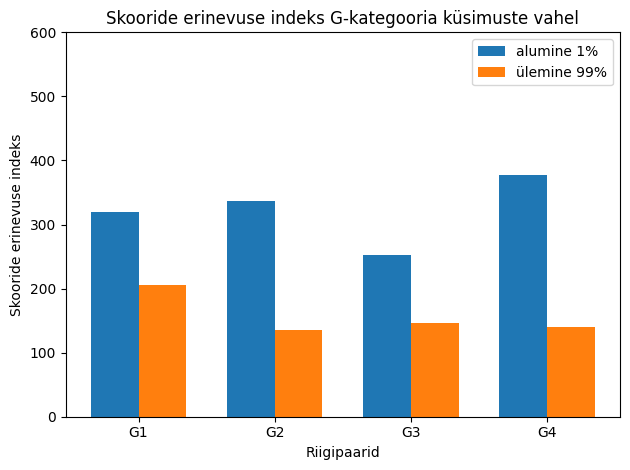

In [ ]:
riigipaarid = ['G1paarid2023.csv','G2paarid2023.csv','G3paarid2023.csv', 'G4paarid2023.csv']
hamming_distances_1pct = []
hamming_distances_99pct = []
bar_width = 0.35

for filename in riigipaarid:
    data = pandas.read_csv(filename)
    pct_1 = data["cosinesimilarity"].quantile(0.01)
    pct_99 = data["cosinesimilarity"].quantile(0.99)
    df_1pct = data[data["cosinesimilarity"] < pct_1]
    df_1pct = df_1pct.reset_index(drop=True)
    df_99pct = data[data["cosinesimilarity"] > pct_99]
    df_99pct = df_99pct.reset_index(drop=True)

    # Calculate the sum of differences for bottom 1% instances
    ajutine_1pct = sum(abs(df_1pct["Skoor"] - df_1pct["Skoor2"]))

    # Calculate the sum of differences for top 99% instances
    ajutine_99pct = sum(abs(df_99pct["Skoor"] - df_99pct["Skoor2"]))
    hamming_distances_1pct.append(ajutine_1pct)
    hamming_distances_99pct.append(ajutine_99pct)

# Set the x locations for the groups
x = np.arange(len(riigipaarid))
plt.bar(x - bar_width/2, hamming_distances_1pct, bar_width, label='alumine 1%')
plt.bar(x + bar_width/2, hamming_distances_99pct, bar_width, label='ülemine 99%')
plt.ylim(0, 600)
# Add labels, title, and legend
plt.xlabel("Riigipaarid")
plt.ylabel("Skooride erinevuse indeks")
plt.title("Skooride erinevuse indeks G-kategooria küsimuste vahel")
hamming = ['G1', 'G2', 'G3', "G4"]
plt.xticks(x, hamming)
plt.legend()
plt.tight_layout()
plt.show()

SKOORIDE SARNASUS STILICO


In [ ]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

riigipaarid = ['C1paarid2023.csv','C2paarid2023.csv','C3paarid2023.csv']
hamming_distances_1pct = []
hamming_distances_99pct = []

# Define the width of each bar
bar_width = 0.35

for filename in riigipaarid:
    data = pandas.read_csv(filename)

    # Calculate the 1st percentile
    pct_1 = data["cosinesimilarity"].quantile(0.01)

    # Calculate the 99th percentile
    pct_99 = data["cosinesimilarity"].quantile(0.99)

    # Select the bottom 1% of the data
    df_1pct = data[data["cosinesimilarity"] < pct_1]
    df_1pct = df_1pct.reset_index(drop=True)

    # Select the top 99% of the data
    df_99pct = data[data["cosinesimilarity"] > pct_99]
    df_99pct = df_99pct.reset_index(drop=True)

    # Calculate the sum of differences for bottom 1% instances
    ajutine_1pct = sum(abs(df_1pct["Skoor"] - df_1pct["Skoor2"]))

    # Calculate the sum of differences for top 99% instances
    ajutine_99pct = sum(abs(df_99pct["Skoor"] - df_99pct["Skoor2"]))

    # Append the sums to respective lists
    hamming_distances_1pct.append(ajutine_1pct)
    hamming_distances_99pct.append(ajutine_99pct)

# Set the x locations for the groups
x = np.arange(len(riigipaarid))

# Plotting the bar chart
plt.bar(x - bar_width/2, hamming_distances_1pct, bar_width, label='alumine 1%')
plt.bar(x + bar_width/2, hamming_distances_99pct, bar_width, label='ülemine 99%')
plt.ylim(0, 600)
# Add labels, title, and legend
plt.xlabel("Riigipaarid")
plt.ylabel("Skooride erinevuse indeks")
plt.title("Skooride erinevuse indeks C-kategooria küsimuste vahel")
hamming = ['C1', 'C2', 'C3']
plt.xticks(x, hamming)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

In [ ]:
# Define the datasets
riigipaarid_C = ['C1paarid2023.csv','C2paarid2023.csv','C3paarid2023.csv']
riigipaarid_D = ['D1paarid2023.csv','D2paarid2023.csv','D3paarid2023.csv']

# Define the width of each bar
bar_width = 0.35

# Function to calculate sum of differences for top and bottom instances
def calculate_differences(dataset):
    differences_1pct = []
    differences_99pct = []

    for filename in dataset:
        data = pd.read_csv(filename)

        # Calculate the 1st percentile
        pct_1 = data["cosinesimilarity"].quantile(0.01)

        # Calculate the 99th percentile
        pct_99 = data["cosinesimilarity"].quantile(0.99)

        # Select the bottom 1% of the data
        df_1pct = data[data["cosinesimilarity"] < pct_1]
        ajutine_1pct = sum(abs(df_1pct["Skoor"] - df_1pct["Skoor2"]))

        # Select the top 99% of the data
        df_99pct = data[data["cosinesimilarity"] > pct_99]
        ajutine_99pct = sum(abs(df_99pct["Skoor"] - df_99pct["Skoor2"]))

        differences_1pct.append(ajutine_1pct)
        differences_99pct.append(ajutine_99pct)

    return differences_1pct, differences_99pct

# Calculate differences for riigipaarid_C and riigipaarid_D
differences_1pct_C, differences_99pct_C = calculate_differences(riigipaarid_C)
differences_1pct_D, differences_99pct_D = calculate_differences(riigipaarid_D)

# Set the x locations for the groups
x = np.arange(len(riigipaarid_C))

# Plotting the bar chart for riigipaarid_C
plt.subplot(1, 2, 1)
plt.bar(x - bar_width/2, differences_1pct_C, bar_width, label='C: Bottom 1%')
plt.bar(x + bar_width/2, differences_99pct_C, bar_width, label='C: Top 99%')
plt.title("Skooride erinevuse indeks C-kategooria küsimuste vahel")
plt.xlabel("Riigipaarid")
plt.ylabel("Skooride erinevuse indeks")
plt.xticks(x, range(1, len(riigipaarid_C) + 1))
plt.legend()

# Plotting the bar chart for riigipaarid_D
plt.subplot(1, 2, 2)
plt.bar(x - bar_width/2, differences_1pct_D, bar_width, label='D: Bottom 1%')
plt.bar(x + bar_width/2, differences_99pct_D, bar_width, label='D: Top 99%')
plt.title("Skooride erinevuse indeks D-kategooria küsimuste vahel")
plt.xlabel("Riigipaarid")
plt.ylabel("Skooride erinevuse indeks")
plt.xticks(x, range(1, len(riigipaarid_D) + 1))
plt.legend()

# Show plots
plt.tight_layout()
plt.show()

In [ ]:
df_99pct

In [44]:
riikide_nimekiri = [ "afghanistan", "albania", "algeria", "andorra", "angola", "antigua-and-barbuda", "argentina", "armenia", "australia", "austria", "azerbaijan",
         "bahamas", "bahrain", "bangladesh", "barbados", "belarus", "belgium", "belize", "benin", "bhutan", "bolivia", "bosnia-and-herzegovina", "botswana", "brazil", "brunei", "bulgaria", "burkina-faso", "burundi",
          "cabo-verde", "cambodia", "cameroon", "canada", "central-african-republic", "chad", "chile", "china", "colombia", "comoros", "republic-congo", "costa-rica", "cote-divoire", "croatia", "cuba", "cyprus", "czech-republic",
          "denmark", "djibouti", "dominica", "dominican-republic", "democratic-republic-congo", "ecuador", "egypt", "el-salvador", "equatorial-guinea", "eritrea", "estonia", "eswatini", "ethiopia",
          "fiji", "finland", "france", "gabon", "gambia", "georgia", "germany", "ghana", "greece", "grenada", "guatemala", "guinea", "guinea-bissau", "guyana", "haiti", "honduras", "hungary",
          "iceland", "india", "indonesia", "iran", "iraq", "ireland", "israel", "italy", "jamaica", "japan", "jordan", "kazakhstan", "kenya", "kiribati", "kosovo", "kuwait", "kyrgyzstan",
          "laos", "latvia", "lebanon", "lesotho", "liberia", "libya", "liechtenstein", "lithuania", "luxembourg",
         "madagascar", "malawi", "malaysia", "maldives", "mali", "malta", "marshall-islands", "mauritania", "mauritius", "mexico", "micronesia", "moldova", "monaco", "mongolia", "montenegro", "morocco", "mozambique", "myanmar",
          "namibia", "nauru", "nepal", "netherlands", "new-zealand", "nicaragua", "niger", "nigeria", "north-korea", "north-macedonia", "norway",
          "oman", "pakistan", "palau", "panama", "papua-new-guinea", "paraguay", "peru", "philippines", "poland", "portugal", "qatar", "romania", "russia", "rwanda",
          "st-kitts-and-nevis", "st-lucia", "samoa", "san-marino", "sao-tome-and-principe","saudi-arabia", "senegal", "serbia", "seychelles", "sierra-leone", "singapore", "slovakia",
          "slovenia", "solomon-islands","somalia", "south-africa", "south-korea", "south-sudan", "spain", "sri-lanka", "st-vincent-and-grenadines", "sudan", "suriname", "sweden", "switzerland", "syria",
          "taiwan", "tajikistan", "tanzania", "thailand", "timor-leste", "togo", "tonga", "trinidad-and-tobago", "tunisia", "turkey", "turkmenistan", "tuvalu", "uganda", "ukraine", "united-arab-emirates",
          "united-states", "united-kingdom", "uruguay", "uzbekistan", "vanuatu", "venezuela", "vietnam", "yemen", "zambia", "zimbabwe"]

In [45]:
country_codes = [
    "AFG", "ALB", "DZA", "AND", "AGO", "ATG", "ARG", "ARM", "AUS", "AUT", "AZE",
    "BHS", "BHR", "BGD", "BRB", "BLR", "BEL", "BLZ", "BEN", "BTN", "BOL", "BIH",
    "BWA", "BRA", "BRN", "BGR", "BFA", "BDI", "CPV", "KHM", "CMR", "CAN", "CAF",
    "TCD", "CHL", "CHN", "COL", "COM", "COG", "CRI", "CIV", "HRV", "CUB", "CYP",
    "CZE", "DNK", "DJI", "DMA", "DOM", "COD", "ECU", "EGY", "SLV", "GNQ", "ERI",
    "EST", "SWZ", "ETH", "FJI", "FIN", "FRA", "GAB", "GMB", "GEO", "DEU", "GHA",
    "GRC", "GRD", "GTM", "GIN", "GNB", "GUY", "HTI", "HND", "HUN", "ISL", "IND",
    "IDN", "IRN", "IRQ", "IRL", "ISR", "ITA", "JAM", "JPN", "JOR", "KAZ", "KEN",
    "KIR", "XKX", "KWT", "KGZ", "LAO", "LVA", "LBN", "LSO", "LBR", "LBY", "LIE",
    "LTU", "LUX", "MDG", "MWI", "MYS", "MDV", "MLI", "MLT", "MHL", "MRT", "MUS",
    "MEX", "FSM", "MDA", "MCO", "MNG", "MNE", "MAR", "MOZ", "MMR", "NAM", "NRU",
    "NPL", "NLD", "NZL", "NIC", "NER", "NGA", "PRK", "MKD", "NOR", "OMN", "PAK",
    "PLW", "PAN", "PNG", "PRY", "PER", "PHL", "POL", "PRT", "QAT", "ROU", "RUS",
    "RWA", "KNA", "LCA", "WSM", "SMR", "STP", "SAU", "SEN", "SRB", "SYC", "SLE",
    "SGP", "SVK", "SVN", "SLB", "SOM", "ZAF", "KOR", "SSD", "ESP", "LKA", "VCT",
    "SDN", "SUR", "SWE", "CHE", "SYR", "TWN", "TJK", "TZA", "THA", "TLS", "TGO",
    "TON", "TTO", "TUN", "TUR", "TKM", "TUV", "UGA", "UKR", "ARE", "GBR", "USA",
    "URY", "UZB", "VUT", "VEN", "VNM", "YEM", "ZMB", "ZWE"
]

In [46]:
uuritav = dictionarid_99(["C1paarid2023.csv"])
uuritav2 = {key: value for key, value in uuritav[0].items() if value != 0}
print(uuritav2)
keys = uuritav2.keys()
print(keys)
print(len(keys))

{'argentina': 2, 'bahrain': -1, 'bolivia': 2, 'botswana': 13, 'brazil': 7, 'cote-divoire': 4, 'egypt': -4, 'eswatini': -3, 'gabon': -7, 'ghana': 17, 'guinea-bissau': -1, 'haiti': -5, 'hungary': -4, 'iran': -5, 'iraq': 3, 'jordan': -2, 'kazakhstan': -13, 'kenya': -1, 'kuwait': -11, 'kyrgyzstan': -7, 'lebanon': -2, 'lesotho': -2, 'liechtenstein': 2, 'malaysia': 5, 'mali': -15, 'micronesia': 3, 'monaco': 2, 'montenegro': 21, 'myanmar': -6, 'namibia': 12, 'nauru': -3, 'palau': 5, 'papua-new-guinea': 4, 'peru': 1, 'senegal': 16, 'solomon-islands': -1, 'somalia': -2, 'sri-lanka': -1, 'sudan': -1, 'suriname': 1, 'syria': -1, 'taiwan': 1, 'tanzania': -4, 'thailand': -5, 'tunisia': -7, 'turkey': -1, 'tuvalu': 1, 'uganda': -1, 'venezuela': -4, 'yemen': -1, 'zimbabwe': -1}
dict_keys(['argentina', 'bahrain', 'bolivia', 'botswana', 'brazil', 'cote-divoire', 'egypt', 'eswatini', 'gabon', 'ghana', 'guinea-bissau', 'haiti', 'hungary', 'iran', 'iraq', 'jordan', 'kazakhstan', 'kenya', 'kuwait', 'kyrgyzs

In [47]:
import pandas as pd
df = pd.read_csv("D2023.csv")
riigid = df["Country"].tolist()
tekstid = df["Tekst3"].tolist()
skoorid = df["Skoor3"].tolist()
emb = [embedding_extractor(tekst)[0][0] for tekst in tekstid]
embid = np.array(emb)
print(len(embid))

195


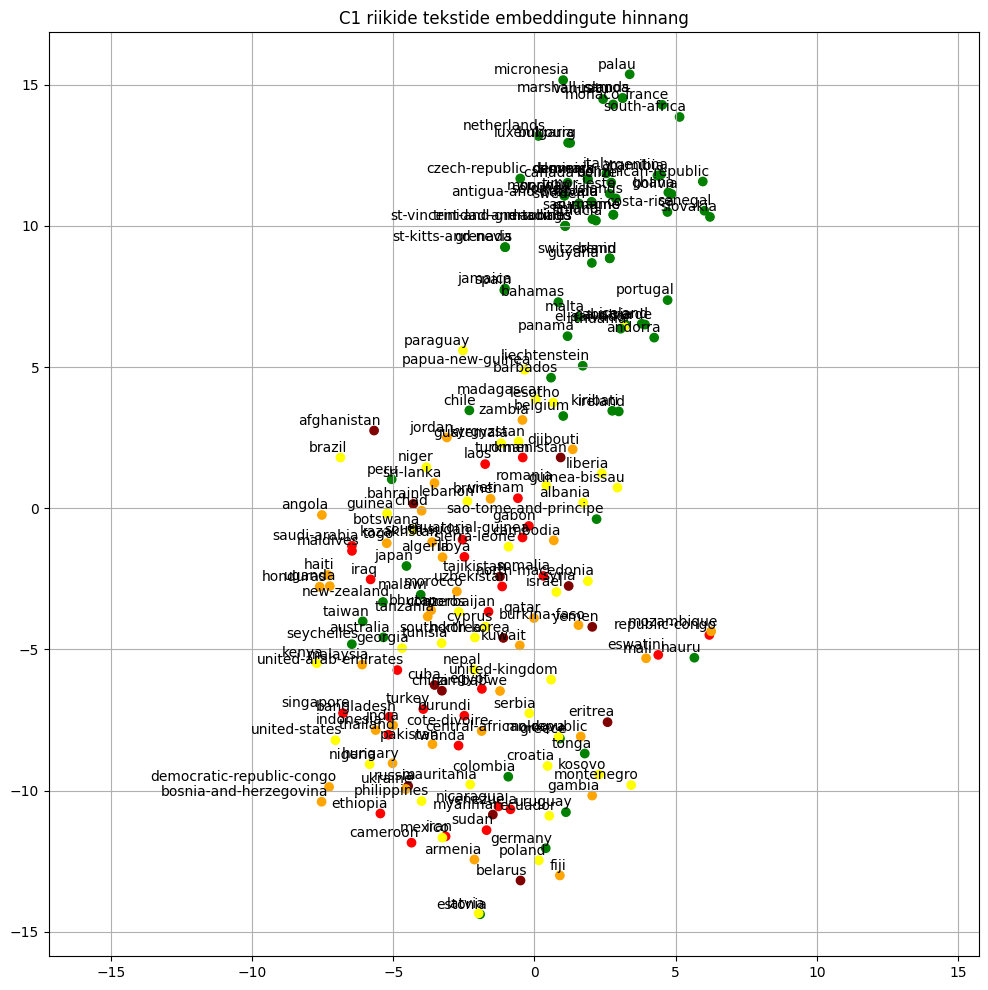

In [48]:
colours2 = np.repeat("maroon", 195)
for i in range(195):
  skoor = skoorid[i]
  if skoor == 4:
    colours2[i] = "green"
  elif skoor == 3:
    colours2[i] = "yellow"
  elif skoor == 2:
    colours2[i] = "orange"
  elif skoor == 1:
    colours2[i] = "red"
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
words_reduced = tsne.fit_transform(embid)

plt.figure(figsize=(12, 12))
plt.scatter(words_reduced[:, 0], words_reduced[:, 1], c = colours2)

for i, word in enumerate(riigid):
    plt.annotate(word, xy=(words_reduced[i, 0], words_reduced[i, 1]), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom')

plt.title('C1 riikide tekstide embeddingute hinnang')
plt.xlabel('')
plt.ylabel('')
plt.grid(True)
plt.axis('equal')
plt.show()

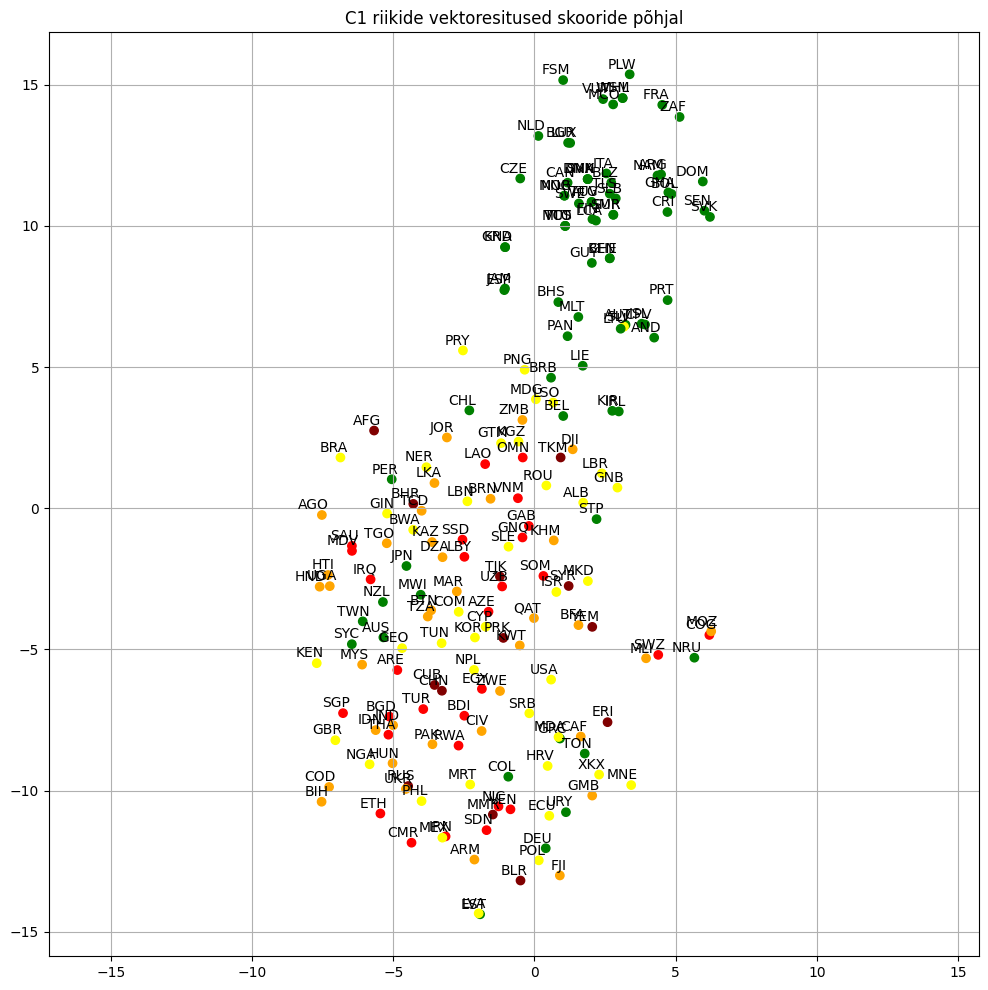

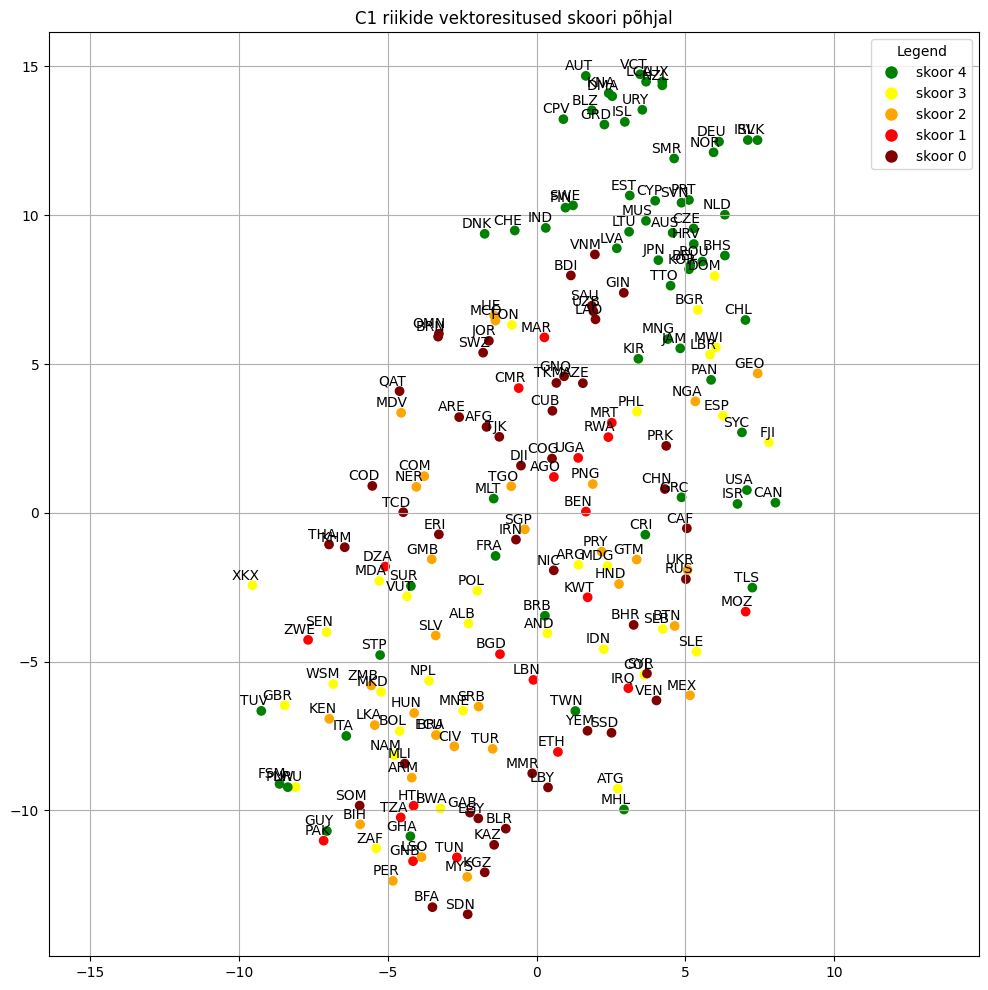

In [99]:
df = pd.read_csv("C2023.csv")
riigid = df["Country"].tolist()
tekstid = df["Tekst"].tolist()
skoorid = df["Skoor"].tolist()
emb = [embedding_extractor(tekst)[0][0] for tekst in tekstid]
embid = np.array(emb)

colours2 = np.repeat("maroon", 195)
for i in range(195):
  skoor = skoorid[i]
  if skoor == 4:
    colours2[i] = "green"
  elif skoor == 3:
    colours2[i] = "yellow"
  elif skoor == 2:
    colours2[i] = "orange"
  elif skoor == 1:
    colours2[i] = "red"

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
words_reduced = tsne.fit_transform(embid)

# Create scatter plot
plt.figure(figsize=(12, 12))
plt.scatter(words_reduced[:, 0], words_reduced[:, 1], c = colours2)

# Annotate each point with the corresponding country code
for i, word in enumerate(riigid):
    plt.annotate(country_codes[i], xy=(words_reduced[i, 0], words_reduced[i, 1]), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom')

# Create legend
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='skoor 4', markerfacecolor='green', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='skoor 3', markerfacecolor='yellow', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='skoor 2', markerfacecolor='orange', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='skoor 1', markerfacecolor='red', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='skoor 0', markerfacecolor='maroon', markersize=10)
]

# Add legend to plot
plt.legend(handles=legend_elements, title="Legend", loc="upper right")

# Set plot title, labels, and grid
plt.title('C1 riikide vektoresitused skoori põhjal')
plt.xlabel('')
plt.ylabel('')
plt.grid(True)
plt.axis('equal')

# Show plot
plt.show()

{'argentina': 2, 'bahrain': -1, 'bolivia': 2, 'botswana': 13, 'brazil': 7, 'cote-divoire': 4, 'egypt': -4, 'eswatini': -3, 'gabon': -7, 'ghana': 17, 'guinea-bissau': -1, 'haiti': -5, 'hungary': -4, 'iran': -5, 'iraq': 3, 'jordan': -2, 'kazakhstan': -13, 'kenya': -1, 'kuwait': -11, 'kyrgyzstan': -7, 'lebanon': -2, 'lesotho': -2, 'liechtenstein': 2, 'malaysia': 5, 'mali': -15, 'micronesia': 3, 'monaco': 2, 'montenegro': 21, 'myanmar': -6, 'namibia': 12, 'nauru': -3, 'palau': 5, 'papua-new-guinea': 4, 'peru': 1, 'senegal': 16, 'solomon-islands': -1, 'somalia': -2, 'sri-lanka': -1, 'sudan': -1, 'suriname': 1, 'syria': -1, 'taiwan': 1, 'tanzania': -4, 'thailand': -5, 'tunisia': -7, 'turkey': -1, 'tuvalu': 1, 'uganda': -1, 'venezuela': -4, 'yemen': -1, 'zimbabwe': -1}
dict_keys(['argentina', 'bahrain', 'bolivia', 'botswana', 'brazil', 'cote-divoire', 'egypt', 'eswatini', 'gabon', 'ghana', 'guinea-bissau', 'haiti', 'hungary', 'iran', 'iraq', 'jordan', 'kazakhstan', 'kenya', 'kuwait', 'kyrgyzs

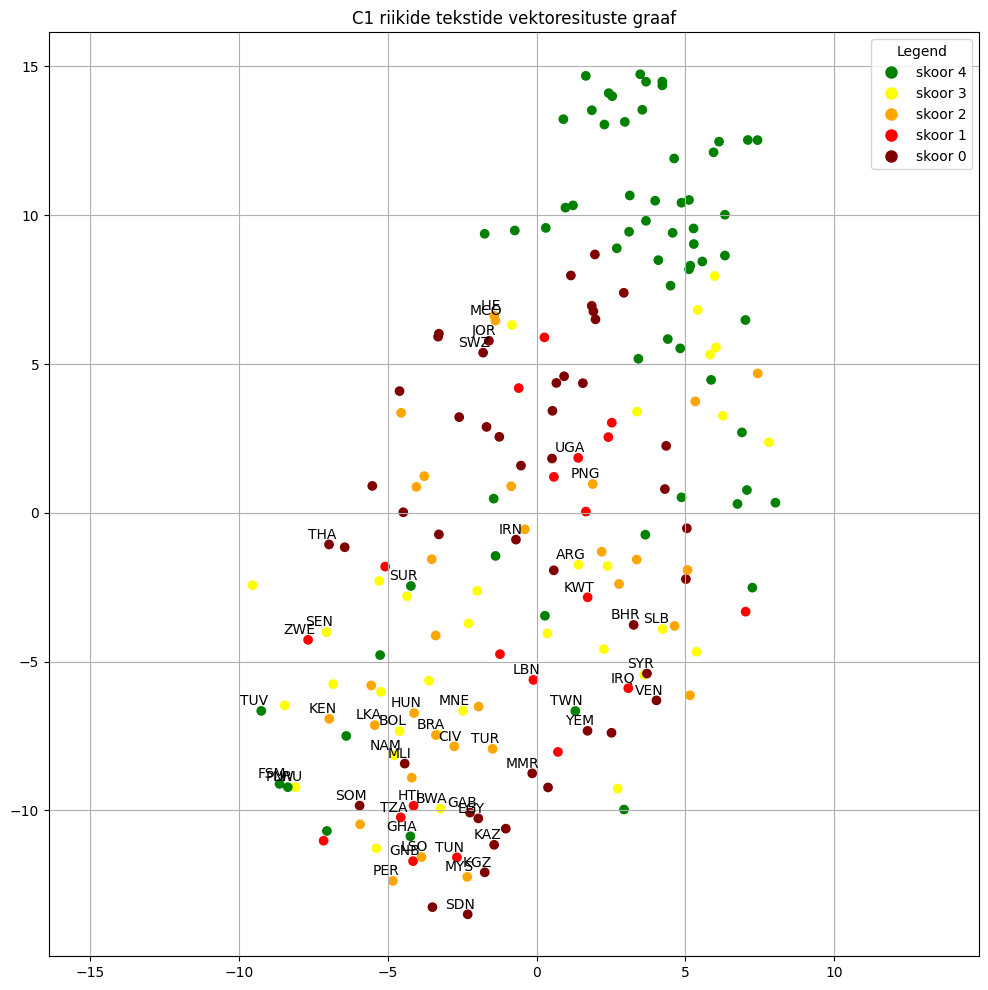

In [100]:
words_reduced = tsne.fit_transform(embid)
uuritav = dictionarid_99(["C1paarid2023.csv"])
uuritav2 = {key: value for key, value in uuritav[0].items() if value != 0}
print(uuritav2)
keysA1 = uuritav2.keys()
print(keysA1)
print(len(keysA1))

plt.figure(figsize=(12, 12))
plt.scatter(words_reduced[:, 0], words_reduced[:, 1], color = colours2)

for i, word in enumerate(riigid):
    if word in keysA1:
      plt.annotate(country_codes[i], xy=(words_reduced[i, 0], words_reduced[i, 1]), xytext=(5, 2),
                  textcoords='offset points', ha='right', va='bottom')
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='skoor 4', markerfacecolor='green', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='skoor 3', markerfacecolor='yellow', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='skoor 2', markerfacecolor='orange', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='skoor 1', markerfacecolor='red', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='skoor 0', markerfacecolor='maroon', markersize=10)
]
# Add legend to plot
plt.legend(handles=legend_elements, title="Legend", loc="upper right")
plt.title('C1 riikide tekstide vektoresituste graaf')
plt.xlabel('')
plt.ylabel('')
plt.grid(True)
plt.axis('equal')
plt.show()

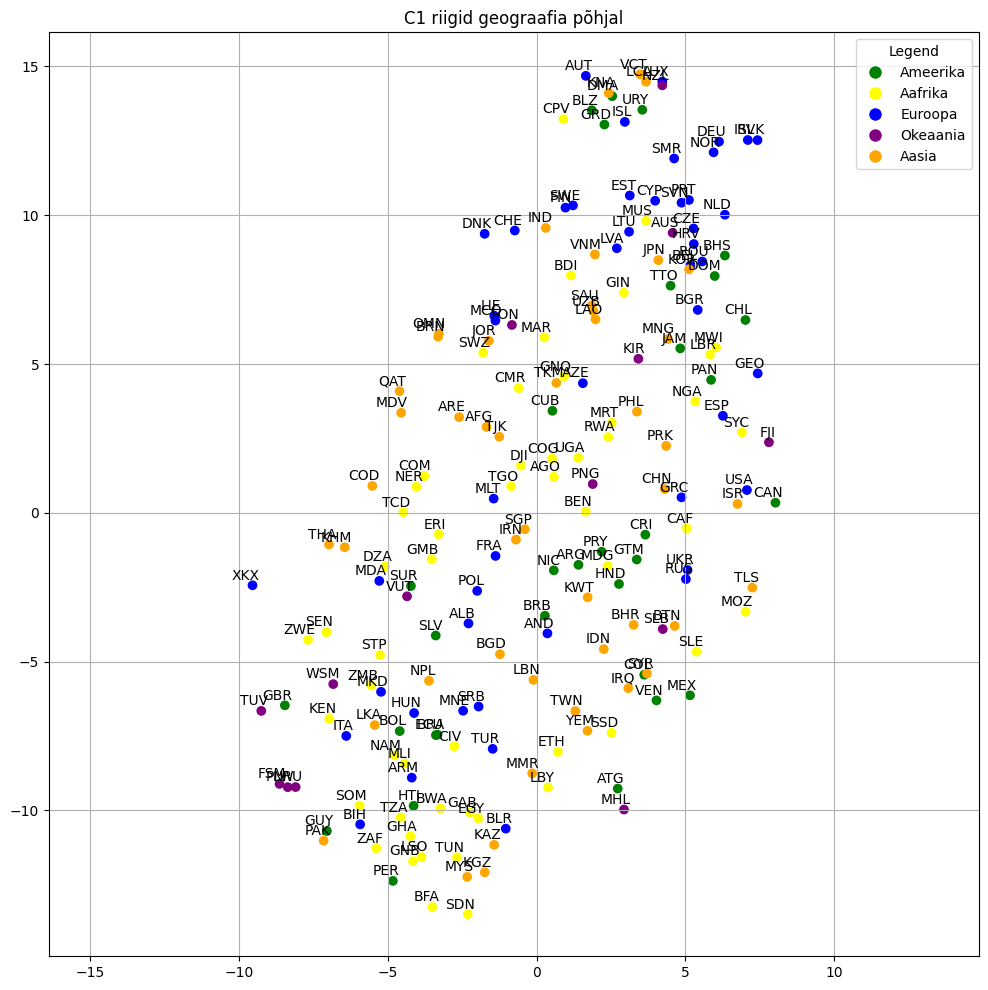

In [101]:
#VÄRVISKEEMA: default ehk aasia on oranz
colours2 = np.repeat("orange", 195)
for i in range(195):
  skoor = riigid[i]
  if skoor in euroopa:
    colours2[i] = "blue"
  elif skoor in ameerikad:
    colours2[i] = "green"
  elif skoor in okeaania:
    colours2[i] = "purple"
  elif skoor in aafrika:
    colours2[i] = "yellow"

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
words_reduced = tsne.fit_transform(embid)

plt.figure(figsize=(12, 12))
plt.scatter(words_reduced[:, 0], words_reduced[:, 1], c = colours2)
# Annotate each point with the corresponding country code
for i, word in enumerate(riigid):
    plt.annotate(country_codes[i], xy=(words_reduced[i, 0], words_reduced[i, 1]), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom')

# Create legend
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Ameerika', markerfacecolor='green', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Aafrika', markerfacecolor='yellow', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Euroopa', markerfacecolor='blue', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Okeaania', markerfacecolor='purple', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Aasia', markerfacecolor='orange', markersize=10)
]

# Add legend to plot
plt.legend(handles=legend_elements, title="Legend", loc="upper right")

plt.title('C1 riigid geograafia põhjal')
plt.xlabel('')
plt.ylabel('')
plt.grid(True)
plt.axis('equal')
plt.show()

D OSa ALGAB SIIT

In [ ]:
#unedited
riigipaarid = ['D1paarid2023.csv','D2paarid2023.csv','D3paarid2023.csv', 'D4paarid2023.csv']
hamming_distances_2std_b = []
riigid_vastavad = []
for i in riigipaarid:
  i = pandas.read_csv(i)
  ajutine = 0
  keskmine = i["cosinesimilarity"].mean()
  std = i["cosinesimilarity"].std()
  df_2std = i[i["cosinesimilarity"] > (keskmine + 1.5*std)]
  df_2std = df_2std.reset_index(drop=True)
  for j in range(df_2std.shape[0]):
    esimene_skoor = df_2std["Skoor"][j]
    teine_skoor = df_2std["Skoor2"][j]
    arvutus = abs(esimene_skoor - teine_skoor)
    ajutine += arvutus
  hamming_distances_2std_b.append(ajutine)

print(hamming_distances_2std_b)
#siin tulpdiagramm nendest, kus on 2std-ga juba eemaldatud asju
x = range(len(hamming_distances_2std_b))
hamming = ['D1', 'D2', 'D3', "D4"]
colors = ['b', 'g', 'r', "y"]
plt.bar(x, hamming_distances_2std_b, color = colors)

plt.xlabel("")
plt.ylabel("skooride erinevuse indeks")
plt.title("Skooride erinevuse indeks D-kategooria küsimuste vahel")
plt.xticks(x, hamming, rotation=45, ha='right')

plt.show()

In [ ]:
df = pd.read_csv("D2023.csv")
riigid = df["Country"].tolist()
tekstid = df["Tekst3"].tolist()
skoorid = df["Skoor3"].tolist()
emb = [embedding_extractor(tekst)[0][0] for tekst in tekstid]
embid = np.array(emb)
print(len(embid))
colours2 = np.repeat("maroon", 195)
for i in range(195):
  skoor = skoorid[i]
  if skoor == 4:
    colours2[i] = "green"
  elif skoor == 3:
    colours2[i] = "yellow"
  elif skoor == 2:
    colours2[i] = "orange"
  elif skoor == 1:
    colours2[i] = "red"

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
words_reduced = tsne.fit_transform(embid)

plt.figure(figsize=(12, 12))
plt.scatter(words_reduced[:, 0], words_reduced[:, 1], c = colours2)

for i, word in enumerate(riigid):
    plt.annotate(word, xy=(words_reduced[i, 0], words_reduced[i, 1]), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom')

plt.title('D3 riikide tekstide embeddingute hinnang')
plt.xlabel('')
plt.ylabel('')
plt.grid(True)
plt.axis('equal')
plt.show()

In [ ]:
df = pd.read_csv("D2023.csv")
riigid = df["Country"].tolist()

#VÄRVISKEEMA:
for i in range(195):
  skoor = riigid[i]
  if skoor in euroopa:
    colours2[i] = "blue"
  elif skoor in ameerikad:
    colours2[i] = "green"
  elif skoor in okeaania:
    colours2[i] = "purple"
  elif skoor in aafrika:
    colours2[i] = "yellow"

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
words_reduced = tsne.fit_transform(embid)

plt.figure(figsize=(12, 12))
plt.scatter(words_reduced[:, 0], words_reduced[:, 1], c = colours2)

for i, word in enumerate(riigid):
    plt.annotate(word, xy=(words_reduced[i, 0], words_reduced[i, 1]), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom')

plt.title('D3 riigid nende geograafia põhjal')
plt.xlabel('')
plt.ylabel('')
plt.grid(True)
plt.axis('equal')
plt.show()

In [ ]:
words_reduced = tsne.fit_transform(embid)
uuritav = dictionarid_2std(["D3paarid2023.csv"])
uuritav2 = {key: value for key, value in uuritav[0].items() if value != 0}
print(uuritav2)
keysA1 = uuritav2.keys()
print(keysA1)
print(len(keysA1))

plt.figure(figsize=(12, 12))
plt.scatter(words_reduced[:, 0], words_reduced[:, 1], color = colours2)

for i, word in enumerate(riigid):
    if word in keysA1:
      plt.annotate(word, xy=(words_reduced[i, 0], words_reduced[i, 1]), xytext=(5, 2),
                  textcoords='offset points', ha='right', va='bottom')

plt.title('D3 riikide tekstide embeddingute hinnang')
plt.xlabel('')
plt.ylabel('')
plt.grid(True)
plt.axis('equal')
plt.show()


**E OSA ALGAB SIIT
**

In [ ]:
#unedited
riigipaarid = ['E1paarid2023.csv','E2paarid2023.csv','E3paarid2023.csv']
hamming_distances_2std_b = []
riigid_vastavad = []
for i in riigipaarid:
  i = pandas.read_csv(i)
  ajutine = 0
  keskmine = i["cosinesimilarity"].mean()
  std = i["cosinesimilarity"].std()
  df_2std = i[i["cosinesimilarity"] > (keskmine + 2*std)]
  df_2std = df_2std.reset_index(drop=True)
  for j in range(df_2std.shape[0]):
    esimene_skoor = df_2std["Skoor"][j]
    teine_skoor = df_2std["Skoor2"][j]
    arvutus = abs(esimene_skoor - teine_skoor)
    ajutine += arvutus
  hamming_distances_2std_b.append(ajutine)

print(hamming_distances_2std_b)
#siin tulpdiagramm nendest, kus on 2std-ga juba eemaldatud asju
x = range(len(hamming_distances_2std_b))
hamming = ['E1', 'E2', 'E3']
colors = ['b', 'g', 'r']
plt.bar(x, hamming_distances_2std_b, color = colors)

plt.xlabel("")
plt.ylabel("skooride erinevuse indeks")
plt.title("Skooride erinevuse indeks E-kategooria küsimuste vahel")
plt.xticks(x, hamming, rotation=45, ha='right')

plt.show()

In [ ]:
df = pd.read_csv("E2023.csv")
riigid = df["Country"].tolist()
tekstid = df["Tekst3"].tolist()
skoorid = df["Skoor3"].tolist()
emb = [embedding_extractor(tekst)[0][0] for tekst in tekstid]
embid = np.array(emb)
print(len(embid))
colours2 = np.repeat("maroon", 195)
for i in range(195):
  skoor = skoorid[i]
  if skoor == 4:
    colours2[i] = "green"
  elif skoor == 3:
    colours2[i] = "yellow"
  elif skoor == 2:
    colours2[i] = "orange"
  elif skoor == 1:
    colours2[i] = "red"

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
words_reduced = tsne.fit_transform(embid)

plt.figure(figsize=(12, 12))
plt.scatter(words_reduced[:, 0], words_reduced[:, 1], c = colours2)

for i, word in enumerate(riigid):
    plt.annotate(country_codes[i], xy=(words_reduced[i, 0], words_reduced[i, 1]), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom')

plt.title('E3 riikide tekstide embeddingute hinnang')
plt.xlabel('')
plt.ylabel('')
plt.grid(True)
plt.axis('equal')
plt.show()

In [ ]:
words_reduced = tsne.fit_transform(embid)
uuritav = dictionarid_2std(["E3paarid2023.csv"])
uuritav2 = {key: value for key, value in uuritav[0].items() if value != 0}
print(uuritav2)
keysA1 = uuritav2.keys()
print(keysA1)
print(len(keysA1))

plt.figure(figsize=(12, 12))
plt.scatter(words_reduced[:, 0], words_reduced[:, 1], color = colours2)

for i, word in enumerate(riigid):
    if word in keysA1:
      plt.annotate(word, xy=(words_reduced[i, 0], words_reduced[i, 1]), xytext=(5, 2),
                  textcoords='offset points', ha='right', va='bottom')

plt.title('E3 riikide tekstide embeddingute hinnang')
plt.xlabel('')
plt.ylabel('')
plt.grid(True)
plt.axis('equal')
plt.show()

In [ ]:
uuritav = dictionarid_2std(["E3paarid2023.csv"])
print(uuritav)
uuritav2 = {key: value for key, value in uuritav[0].items() if value != 0}
print(uuritav2)
keysA1 = uuritav2.keys()
print(keysA1)
print(len(keysA1))

In [ ]:
uuritav = dictionarid_2std(["C1paarid2023.csv"])
print(uuritav)
uuritav2 = {key: value for key, value in uuritav[0].items() if value != 0}
print(uuritav2)
keysA1 = uuritav2.keys()
print(keysA1)
print(len(keysA1))

F OSA ALGAB SIIT

In [ ]:
failist_riigipaarideni("F2023.csv", 1)
failist_riigipaarideni("F2023.csv", 2)
failist_riigipaarideni("F2023.csv", 3)
failist_riigipaarideni("F2023.csv", 4)

In [ ]:
riigipaarid = ['F1paarid2023.csv','F2paarid2023.csv','F3paarid2023.csv', 'F4paarid2023.csv']
hamming_distances_2std_b = []
riigid_vastavad = []
for i in riigipaarid:
  i = pandas.read_csv(i)
  ajutine = 0
  keskmine = i["cosinesimilarity"].mean()
  std = i["cosinesimilarity"].std()
  df_2std = i[i["cosinesimilarity"] > (keskmine + 2*std)]
  df_2std = df_2std.reset_index(drop=True)
  for j in range(df_2std.shape[0]):
    esimene_skoor = df_2std["Skoor"][j]
    teine_skoor = df_2std["Skoor2"][j]
    arvutus = abs(esimene_skoor - teine_skoor)
    ajutine += arvutus
  hamming_distances_2std_b.append(ajutine)

print(hamming_distances_2std_b)
#siin tulpdiagramm nendest, kus on 2std-ga juba eemaldatud asju
x = range(len(hamming_distances_2std_b))
hamming = ['F1', 'F2', 'F3', "F4"]
colors = ['b', 'g', 'r', "y"]
plt.bar(x, hamming_distances_2std_b, color = colors)

plt.xlabel("")
plt.ylabel("skooride erinevuse indeks")
plt.title("Skooride erinevuse indeks F-kategooria küsimuste vahel")
plt.xticks(x, hamming, rotation=45, ha='right')

plt.show()

In [ ]:
df = pd.read_csv("F2023.csv")
riigid = df["Country"].tolist()
tekstid = df["Tekst4"].tolist()
skoorid = df["Skoor4"].tolist()
emb = [embedding_extractor(tekst)[0][0] for tekst in tekstid]
embid = np.array(emb)
print(len(embid))
colours2 = np.repeat("maroon", 195)
for i in range(195):
  skoor = skoorid[i]
  if skoor == 4:
    colours2[i] = "green"
  elif skoor == 3:
    colours2[i] = "yellow"
  elif skoor == 2:
    colours2[i] = "orange"
  elif skoor == 1:
    colours2[i] = "red"


In [ ]:
print(len(skoorid))

In [ ]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
words_reduced = tsne.fit_transform(embid)

plt.figure(figsize=(12, 12))
scatter = plt.scatter(words_reduced[:, 0], words_reduced[:, 1], c = colours2)

for i, word in enumerate(riigid):
    plt.annotate(word, xy=(words_reduced[i, 0], words_reduced[i, 1]), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom')

plt.title('F4 riikide tekstide embeddingute hinnang')
plt.xlabel('')
plt.ylabel('')
plt.grid(True)
plt.axis('equal')
# Add a legend
legend_labels = ['tumepunane', 'Punane', 'Oranž','Kollane', 'Roheline']  # Replace with your actual labels
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels)

plt.show()

In [ ]:
words_reduced = tsne.fit_transform(embid)
uuritav = dictionarid_2std(["F4paarid2023.csv"])
#print(uuritav)
uuritav2 = {key: value for key, value in uuritav[0].items() if value != 0}
#print(uuritav2)
keysA1 = uuritav2.keys()
#print(keysA1)
#print(len(keysA1))

plt.figure(figsize=(12, 12))
plt.scatter(words_reduced[:, 0], words_reduced[:, 1], color = colours2)

for i, word in enumerate(riigid):
    if word in keysA1:
      plt.annotate(word, xy=(words_reduced[i, 0], words_reduced[i, 1]), xytext=(5, 2),
                  textcoords='offset points', ha='right', va='bottom')

plt.title('F4 riikide tekstide embeddingute hinnang')
plt.xlabel('')
plt.ylabel('')
plt.grid(True)
plt.axis('equal')
plt.show()

G OSA ALGAB SIIT.

In [ ]:
riigipaarid = ['G1paarid2023.csv','G2paarid2023.csv','G3paarid2023.csv', 'G4paarid2023.csv']
hamming_distances_2std_b = []
riigid_vastavad = []
for i in riigipaarid:
  i = pandas.read_csv(i)
  ajutine = 0
  keskmine = i["cosinesimilarity"].mean()
  std = i["cosinesimilarity"].std()
  df_2std = i[i["cosinesimilarity"] > (keskmine + 2*std)]
  df_2std = df_2std.reset_index(drop=True)
  for j in range(df_2std.shape[0]):
    esimene_skoor = df_2std["Skoor"][j]
    teine_skoor = df_2std["Skoor2"][j]
    arvutus = abs(esimene_skoor - teine_skoor)
    ajutine += arvutus
  hamming_distances_2std_b.append(ajutine)

print(hamming_distances_2std_b)
#siin tulpdiagramm nendest, kus on 2std-ga juba eemaldatud asju
x = range(len(hamming_distances_2std_b))
hamming = ['G1', 'G2', 'G3', "G4"]
colors = ['b', 'g', 'r', "y"]
plt.bar(x, hamming_distances_2std_b, color = colors)

plt.xlabel("")
plt.ylabel("skooride erinevuse indeks")
plt.title("Skooride erinevuse indeks G-kategooria küsimuste vahel")
plt.xticks(x, hamming, rotation=45, ha='right')

plt.show()

In [ ]:
df = pd.read_csv("G2023.csv")
riigid = df["Country"].tolist()
tekstid = df["Tekst3"].tolist()
skoorid = df["Skoor3"].tolist()
keskmine = df["Skoor3"].mean()
print(keskmine)
emb = [embedding_extractor(tekst)[0][0] for tekst in tekstid]
embid = np.array(emb)
print(len(embid))
colours2 = np.repeat("maroon", 195)
for i in range(195):
  skoor = skoorid[i]
  if skoor == 4:
    colours2[i] = "green"
  elif skoor == 3:
    colours2[i] = "yellow"
  elif skoor == 2:
    colours2[i] = "orange"
  elif skoor == 1:
    colours2[i] = "red"

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
words_reduced = tsne.fit_transform(embid)

plt.figure(figsize=(12, 12))
plt.scatter(words_reduced[:, 0], words_reduced[:, 1], c = colours2)

for i, word in enumerate(riigid):
    plt.annotate(word, xy=(words_reduced[i, 0], words_reduced[i, 1]), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom')

plt.title('G3 riikide tekstide embeddingute hinnangud')
plt.xlabel('')
plt.ylabel('')
plt.grid(True)
plt.axis('equal')
plt.show()

In [ ]:
words_reduced = tsne.fit_transform(embid)
uuritav = dictionarid_2std(["G3paarid2023.csv"])
uuritav2 = {key: value for key, value in uuritav[0].items() if value != 0}
print(uuritav2)
keysA1 = uuritav2.keys()
print(keysA1)
print(len(keysA1))

plt.figure(figsize=(12, 12))
plt.scatter(words_reduced[:, 0], words_reduced[:, 1], color = colours2)

for i, word in enumerate(riigid):
    if word in keysA1:
      plt.annotate(word, xy=(words_reduced[i, 0], words_reduced[i, 1]), xytext=(5, 2),
                  textcoords='offset points', ha='right', va='bottom')

plt.title('G3 riikide tekstide embeddingute hinnang')
plt.xlabel('')
plt.ylabel('')
plt.grid(True)
plt.axis('equal')
plt.show()

SIIT ALATES PROOVIN TAGURTPIDI HALBASID TEKSTE

In [ ]:
riigipaarid = ['G1paarid2023.csv','G2paarid2023.csv','G3paarid2023.csv', 'G4paarid2023.csv']
hamming_distances_2std_tagurtpidi = []
riigid_vastavad = []
for i in riigipaarid:
  i = pandas.read_csv(i)
  ajutine = 0
  keskmine = i["cosinesimilarity"].mean()
  std = i["cosinesimilarity"].std()
  print((keskmine - 2*std))
  df_2std = i[i["cosinesimilarity"] < (keskmine - 2*std)]
  df_2std = df_2std.reset_index(drop=True)
  for j in range(df_2std.shape[0]):
    esimene_skoor = df_2std["Skoor"][j]
    teine_skoor = df_2std["Skoor2"][j]
    arvutus = abs(esimene_skoor - teine_skoor)
    ajutine += arvutus
  hamming_distances_2std_tagurtpidi.append(ajutine)

print(hamming_distances_2std_tagurtpidi)
#siin tulpdiagramm nendest, kus on 2std-ga juba eemaldatud asju
x = range(len(hamming_distances_2std_tagurtpidi))
hamming = ['G1', 'G2', 'G3', "G4"]
colors = ['b', 'g', 'r', "y"]
plt.bar(x, hamming_distances_2std_tagurtpidi, color = colors)

plt.xlabel("")
plt.ylabel("skooride erinevuse indeks")
plt.title("Skooride erinevuse indeks G-kategooria küsimuste vahel")
plt.xticks(x, hamming, rotation=45, ha='right')

plt.show()

In [ ]:
df_2std
sorted_df = df_2std.sort_values(by='cosinesimilarity', ascending=True)
sorted_df

SIIN PROOVIN GEOGRAAFILIST ERALDADA


In [ ]:
df = pd.read_csv("F2023.csv")
riigid = df["Country"].tolist()
tekstid = df["Tekst4"].tolist()
skoorid = df["Skoor4"].tolist()
emb = [embedding_extractor(tekst)[0][0] for tekst in tekstid]
embid = np.array(emb)
print(len(embid))
colours2 = np.repeat("orange", 195)
aafrika = [
    "algeria", "angola", "benin", "botswana", "burkina-faso", "burundi",
    "cabo-verde", "cameroon", "central-african-republic", "chad",
    "comoros", "republic-congo", "cote-divoire", "djibouti", "egypt",
    "equatorial-guinea", "eritrea", "eswatini", "ethiopia", "gabon",
    "gambia", "ghana", "guinea", "guinea-bissau", "kenya", "lesotho",
    "liberia", "libya", "madagascar", "malawi", "mali", "mauritania",
    "mauritius", "morocco", "mozambique", "namibia", "niger", "nigeria",
    "rwanda", "sao-tome-and-principe", "senegal", "seychelles",
    "sierra-leone", "somalia", "south-africa", "south-sudan", "sudan",
    "tanzania", "togo", "tunisia", "uganda", "zambia", "zimbabwe"
]
aasia = [
    "afghanistan", "armenia", "azerbaijan", "bahrain", "bangladesh",
    "bhutan", "brunei", "cambodia", "china", "cyprus", "georgia",
    "india", "indonesia", "iran", "iraq", "israel", "japan", "jordan",
    "kazakhstan", "kuwait", "kyrgyzstan", "laos", "lebanon", "malaysia",
    "maldives", "mongolia", "myanmar", "nepal", "north-korea", "oman",
    "pakistan", "palestine", "philippines", "qatar", "saudi-arabia",
    "singapore", "south-korea", "sri-lanka", "syria", "taiwan", "tajikistan",
    "thailand", "timor-leste", "turkmenistan", "united-arab-emirates",
    "uzbekistan", "vietnam", "yemen"
]
ameerikad = [
    "antigua-and-barbuda", "argentina", "bahamas", "barbados", "belize",
    "bolivia", "brazil", "canada", "chile", "colombia", "costa-rica",
    "cuba", "dominica", "dominican-republic", "ecuador", "el-salvador",
    "grenada", "guatemala", "guyana", "haiti", "honduras", "jamaica",
    "mexico", "nicaragua", "panama", "paraguay", "peru", "saint-kitts-and-nevis",
    "saint-lucia", "saint-vincent-and-grenadines", "suriname", "trinidad-and-tobago",
    "united-states", "uruguay", "venezuela"
]
euroopa = [
    "albania", "andorra", "armenia", "austria", "azerbaijan", "belarus",
    "belgium", "bosnia-and-herzegovina", "bulgaria", "croatia", "cyprus",
    "czech-republic", "denmark", "estonia", "finland", "france", "georgia",
    "germany", "greece", "hungary", "iceland", "ireland", "italy", "kosovo",
    "latvia", "liechtenstein", "lithuania", "luxembourg", "malta", "moldova",
    "monaco", "montenegro", "netherlands", "north-macedonia", "norway", "poland",
    "portugal", "romania", "russia", "san-marino", "serbia", "slovakia", "slovenia",
    "spain", "sweden", "switzerland", "turkey", "ukraine", "united-kingdom"
]
okeaania = [
    "australia", "fiji", "kiribati", "marshall-islands", "micronesia",
    "nauru", "new-zealand", "palau", "papua-new-guinea", "samoa",
    "solomon-islands", "tonga", "tuvalu", "vanuatu"
]
#VÄRVISKEEMA:
for i in range(195):
  skoor = riigid[i]
  if skoor in euroopa:
    colours2[i] = "blue"
  elif skoor in ameerikad:
    colours2[i] = "green"
  elif skoor in okeaania:
    colours2[i] = "purple"
  elif skoor in aafrika:
    colours2[i] = "yellow"

tsne = TSNE(n_components=2, perplexity=30, random_state=41)
words_reduced = tsne.fit_transform(embid)

plt.figure(figsize=(12, 12))
plt.scatter(words_reduced[:, 0], words_reduced[:, 1], c = colours2)

for i, word in enumerate(riigid):
    plt.annotate(word, xy=(words_reduced[i, 0], words_reduced[i, 1]), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom')

plt.title('F4 riigid nende geograafia põhjal')
plt.xlabel('')
plt.ylabel('')
plt.grid(True)
plt.axis('equal')
plt.show()

In [ ]:
df = pd.read_csv("D2023.csv")
riigid = df["Country"].tolist()

#VÄRVISKEEMA:
for i in range(195):
  skoor = riigid[i]
  if skoor in euroopa:
    colours2[i] = "blue"
  elif skoor in ameerikad:
    colours2[i] = "green"
  elif skoor in okeaania:
    colours2[i] = "purple"
  elif skoor in aafrika:
    colours2[i] = "yellow"

tsne = TSNE(n_components=2, perplexity=30, random_state=41)
words_reduced = tsne.fit_transform(embid)

plt.figure(figsize=(12, 12))
plt.scatter(words_reduced[:, 0], words_reduced[:, 1], c = colours2)

for i, word in enumerate(riigid):
    plt.annotate(word, xy=(words_reduced[i, 0], words_reduced[i, 1]), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom')

plt.title('D3 riigid nende geograafia põhjal')
plt.xlabel('')
plt.ylabel('')
plt.grid(True)
plt.axis('equal')
plt.show()

In [ ]:
df = pd.read_csv("E2023.csv")
riigid = df["Country"].tolist()
tekstid = df["Tekst3"].tolist()
skoorid = df["Skoor3"].tolist()
emb = [embedding_extractor(tekst)[0][0] for tekst in tekstid]
embid = np.array(emb)
print(len(embid))
colours2 = np.repeat("orange", 195)
aafrika = [
    "algeria", "angola", "benin", "botswana", "burkina-faso", "burundi",
    "cabo-verde", "cameroon", "central-african-republic", "chad",
    "comoros", "republic-congo", "cote-divoire", "djibouti", "egypt",
    "equatorial-guinea", "eritrea", "eswatini", "ethiopia", "gabon",
    "gambia", "ghana", "guinea", "guinea-bissau", "kenya", "lesotho",
    "liberia", "libya", "madagascar", "malawi", "mali", "mauritania",
    "mauritius", "morocco", "mozambique", "namibia", "niger", "nigeria",
    "rwanda", "sao-tome-and-principe", "senegal", "seychelles",
    "sierra-leone", "somalia", "south-africa", "south-sudan", "sudan",
    "tanzania", "togo", "tunisia", "uganda", "zambia", "zimbabwe"
]
aasia = [
    "afghanistan", "armenia", "azerbaijan", "bahrain", "bangladesh",
    "bhutan", "brunei", "cambodia", "china", "cyprus", "georgia",
    "india", "indonesia", "iran", "iraq", "israel", "japan", "jordan",
    "kazakhstan", "kuwait", "kyrgyzstan", "laos", "lebanon", "malaysia",
    "maldives", "mongolia", "myanmar", "nepal", "north-korea", "oman",
    "pakistan", "palestine", "philippines", "qatar", "saudi-arabia",
    "singapore", "south-korea", "sri-lanka", "syria", "taiwan", "tajikistan",
    "thailand", "timor-leste", "turkmenistan", "united-arab-emirates",
    "uzbekistan", "vietnam", "yemen"
]
ameerikad = [
    "antigua-and-barbuda", "argentina", "bahamas", "barbados", "belize",
    "bolivia", "brazil", "canada", "chile", "colombia", "costa-rica",
    "cuba", "dominica", "dominican-republic", "ecuador", "el-salvador",
    "grenada", "guatemala", "guyana", "haiti", "honduras", "jamaica",
    "mexico", "nicaragua", "panama", "paraguay", "peru", "saint-kitts-and-nevis",
    "saint-lucia", "saint-vincent-and-grenadines", "suriname", "trinidad-and-tobago",
    "united-states", "uruguay", "venezuela"
]
euroopa = [
    "albania", "andorra", "armenia", "austria", "azerbaijan", "belarus",
    "belgium", "bosnia-and-herzegovina", "bulgaria", "croatia", "cyprus",
    "czech-republic", "denmark", "estonia", "finland", "france", "georgia",
    "germany", "greece", "hungary", "iceland", "ireland", "italy", "kosovo",
    "latvia", "liechtenstein", "lithuania", "luxembourg", "malta", "moldova",
    "monaco", "montenegro", "netherlands", "north-macedonia", "norway", "poland",
    "portugal", "romania", "russia", "san-marino", "serbia", "slovakia", "slovenia",
    "spain", "sweden", "switzerland", "turkey", "ukraine", "united-kingdom"
]
okeaania = [
    "australia", "fiji", "kiribati", "marshall-islands", "micronesia",
    "nauru", "new-zealand", "palau", "papua-new-guinea", "samoa",
    "solomon-islands", "tonga", "tuvalu", "vanuatu"
]
#VÄRVISKEEMA:
for i in range(195):
  skoor = riigid[i]
  if skoor in euroopa:
    colours2[i] = "blue"
  elif skoor in ameerikad:
    colours2[i] = "green"
  elif skoor in okeaania:
    colours2[i] = "purple"
  elif skoor in aafrika:
    colours2[i] = "yellow"

tsne = TSNE(n_components=2, perplexity=30, random_state=41)
words_reduced = tsne.fit_transform(embid)

plt.figure(figsize=(12, 12))
plt.scatter(words_reduced[:, 0], words_reduced[:, 1], c = colours2)

for i, word in enumerate(riigid):
    plt.annotate(word, xy=(words_reduced[i, 0], words_reduced[i, 1]), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom')

plt.title('E3 riigid nende geograafia põhjal')
plt.xlabel('')
plt.ylabel('')
plt.grid(True)
plt.axis('equal')
plt.show()

195


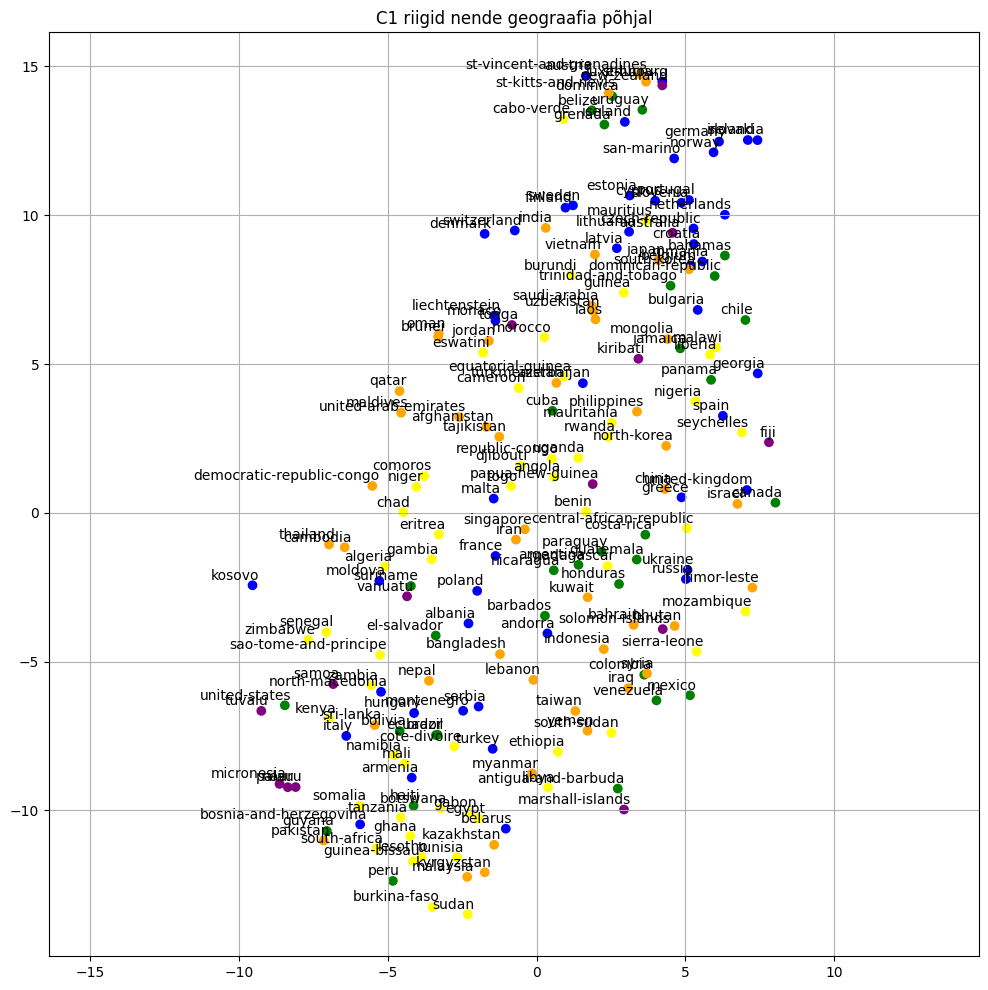

In [51]:
df = pd.read_csv("C2023.csv")
riigid = df["Country"].tolist()
tekstid = df["Tekst"].tolist()
skoorid = df["Skoor"].tolist()
emb = [embedding_extractor(tekst)[0][0] for tekst in tekstid]
embid = np.array(emb)
print(len(embid))
colours2 = np.repeat("orange", 195)
aafrika = [
    "algeria", "angola", "benin", "botswana", "burkina-faso", "burundi",
    "cabo-verde", "cameroon", "central-african-republic", "chad",
    "comoros", "republic-congo", "cote-divoire", "djibouti", "egypt",
    "equatorial-guinea", "eritrea", "eswatini", "ethiopia", "gabon",
    "gambia", "ghana", "guinea", "guinea-bissau", "kenya", "lesotho",
    "liberia", "libya", "madagascar", "malawi", "mali", "mauritania",
    "mauritius", "morocco", "mozambique", "namibia", "niger", "nigeria",
    "rwanda", "sao-tome-and-principe", "senegal", "seychelles",
    "sierra-leone", "somalia", "south-africa", "south-sudan", "sudan",
    "tanzania", "togo", "tunisia", "uganda", "zambia", "zimbabwe"
]
aasia = [
    "afghanistan", "armenia", "azerbaijan", "bahrain", "bangladesh",
    "bhutan", "brunei", "cambodia", "china", "cyprus", "georgia",
    "india", "indonesia", "iran", "iraq", "israel", "japan", "jordan",
    "kazakhstan", "kuwait", "kyrgyzstan", "laos", "lebanon", "malaysia",
    "maldives", "mongolia", "myanmar", "nepal", "north-korea", "oman",
    "pakistan", "palestine", "philippines", "qatar", "saudi-arabia",
    "singapore", "south-korea", "sri-lanka", "syria", "taiwan", "tajikistan",
    "thailand", "timor-leste", "turkmenistan", "united-arab-emirates",
    "uzbekistan", "vietnam", "yemen"
]
ameerikad = [
    "antigua-and-barbuda", "argentina", "bahamas", "barbados", "belize",
    "bolivia", "brazil", "canada", "chile", "colombia", "costa-rica",
    "cuba", "dominica", "dominican-republic", "ecuador", "el-salvador",
    "grenada", "guatemala", "guyana", "haiti", "honduras", "jamaica",
    "mexico", "nicaragua", "panama", "paraguay", "peru", "saint-kitts-and-nevis",
    "saint-lucia", "saint-vincent-and-grenadines", "suriname", "trinidad-and-tobago",
    "united-states", "uruguay", "venezuela"
]
euroopa = [
    "albania", "andorra", "armenia", "austria", "azerbaijan", "belarus",
    "belgium", "bosnia-and-herzegovina", "bulgaria", "croatia", "cyprus",
    "czech-republic", "denmark", "estonia", "finland", "france", "georgia",
    "germany", "greece", "hungary", "iceland", "ireland", "italy", "kosovo",
    "latvia", "liechtenstein", "lithuania", "luxembourg", "malta", "moldova",
    "monaco", "montenegro", "netherlands", "north-macedonia", "norway", "poland",
    "portugal", "romania", "russia", "san-marino", "serbia", "slovakia", "slovenia",
    "spain", "sweden", "switzerland", "turkey", "ukraine", "united-kingdom"
]
okeaania = [
    "australia", "fiji", "kiribati", "marshall-islands", "micronesia",
    "nauru", "new-zealand", "palau", "papua-new-guinea", "samoa",
    "solomon-islands", "tonga", "tuvalu", "vanuatu"
]
#VÄRVISKEEMA: default ehk aasia on oranz
for i in range(195):
  skoor = riigid[i]
  if skoor in euroopa:
    colours2[i] = "blue"
  elif skoor in ameerikad:
    colours2[i] = "green"
  elif skoor in okeaania:
    colours2[i] = "purple"
  elif skoor in aafrika:
    colours2[i] = "yellow"

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
words_reduced = tsne.fit_transform(embid)

plt.figure(figsize=(12, 12))
plt.scatter(words_reduced[:, 0], words_reduced[:, 1], c = colours2)

for i, word in enumerate(riigid):
    plt.annotate(word, xy=(words_reduced[i, 0], words_reduced[i, 1]), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom')

plt.title('C1 riigid nende geograafia põhjal')
plt.xlabel('')
plt.ylabel('')
plt.grid(True)
plt.axis('equal')
plt.show()

In [ ]:
df = pd.read_csv("G2023.csv")
riigid = df["Country"].tolist()
tekstid = df["Tekst3"].tolist()
skoorid = df["Skoor3"].tolist()
emb = [embedding_extractor(tekst)[0][0] for tekst in tekstid]
embid = np.array(emb)

#VÄRVISKEEMA: default ehk aasia on oranz
colours2 = np.repeat("orange", 195)
for i in range(195):
  skoor = riigid[i]
  if skoor in euroopa:
    colours2[i] = "blue"
  elif skoor in ameerikad:
    colours2[i] = "green"
  elif skoor in okeaania:
    colours2[i] = "purple"
  elif skoor in aafrika:
    colours2[i] = "yellow"

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
words_reduced = tsne.fit_transform(embid)

plt.figure(figsize=(12, 12))
plt.scatter(words_reduced[:, 0], words_reduced[:, 1], c = colours2)

for i, word in enumerate(riigid):
    plt.annotate(word, xy=(words_reduced[i, 0], words_reduced[i, 1]), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom')

plt.title('G3 riigid nende geograafia põhjal')
plt.xlabel('')
plt.ylabel('')
plt.grid(True)
plt.axis('equal')
plt.show()

In [ ]:
df = pd.read_csv("A2023.csv")
riigid = df["Country"].tolist()
tekstid = df["Tekst"].tolist()
skoorid = df["Skoor"].tolist()
emb = [embedding_extractor(tekst)[0][0] for tekst in tekstid]
embid = np.array(emb)

#VÄRVISKEEMA: default ehk aasia on oranz
colours2 = np.repeat("orange", 195)
for i in range(195):
  skoor = riigid[i]
  if skoor in euroopa:
    colours2[i] = "blue"
  elif skoor in ameerikad:
    colours2[i] = "green"
  elif skoor in okeaania:
    colours2[i] = "purple"
  elif skoor in aafrika:
    colours2[i] = "yellow"

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
words_reduced = tsne.fit_transform(embid)

plt.figure(figsize=(12, 12))
plt.scatter(words_reduced[:, 0], words_reduced[:, 1], c = colours2)

for i, word in enumerate(riigid):
    plt.annotate(word, xy=(words_reduced[i, 0], words_reduced[i, 1]), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom')

plt.title('A1 riigid nende geograafia põhjal')
plt.xlabel('')
plt.ylabel('')
plt.grid(True)
plt.axis('equal')
plt.show()

In [ ]:
df = pd.read_csv("B2023.csv")
riigid = df["Country"].tolist()
tekstid = df["Tekst2"].tolist()
skoorid = df["Skoor2"].tolist()
emb = [embedding_extractor(tekst)[0][0] for tekst in tekstid]
embid = np.array(emb)

#VÄRVISKEEMA: default ehk aasia on oranz
colours2 = np.repeat("orange", 195)
for i in range(195):
  skoor = riigid[i]
  if skoor in euroopa:
    colours2[i] = "blue"
  elif skoor in ameerikad:
    colours2[i] = "green"
  elif skoor in okeaania:
    colours2[i] = "purple"
  elif skoor in aafrika:
    colours2[i] = "yellow"

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
words_reduced = tsne.fit_transform(embid)

plt.figure(figsize=(12, 12))
plt.scatter(words_reduced[:, 0], words_reduced[:, 1], c = colours2)

for i, word in enumerate(riigid):
    plt.annotate(word, xy=(words_reduced[i, 0], words_reduced[i, 1]), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom')

plt.title('B2 riigid nende geograafia põhjal')
plt.xlabel('')
plt.ylabel('')
plt.grid(True)
plt.axis('equal')
plt.show()